In [1113]:
import numpy as np
import xtrack as xt
import xobjects as xo
import xpart as xp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import constants 
from matplotlib.patches import Patch
#### PLOT THE DATA #######
SMALL_SIZE = 13.5
MEDIUM_SIZE = 17
BIGGER_SIZE = 23
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [1114]:
from ion_properties import ions,lead,xenon,calcium,xenon2nd


In [1115]:
# context = xo.ContextCpu(omp_num_threads=4)
context = xo.ContextCpu()

line = xt.Line.from_json('sps.json')
particle_ref=line.particle_ref
line.build_tracker()

clight=constants.speed_of_light
circumference=line.get_length()

Loading line from dict:   0%|          | 0/38786 [00:00<?, ?it/s]

Done loading line from dict.           
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


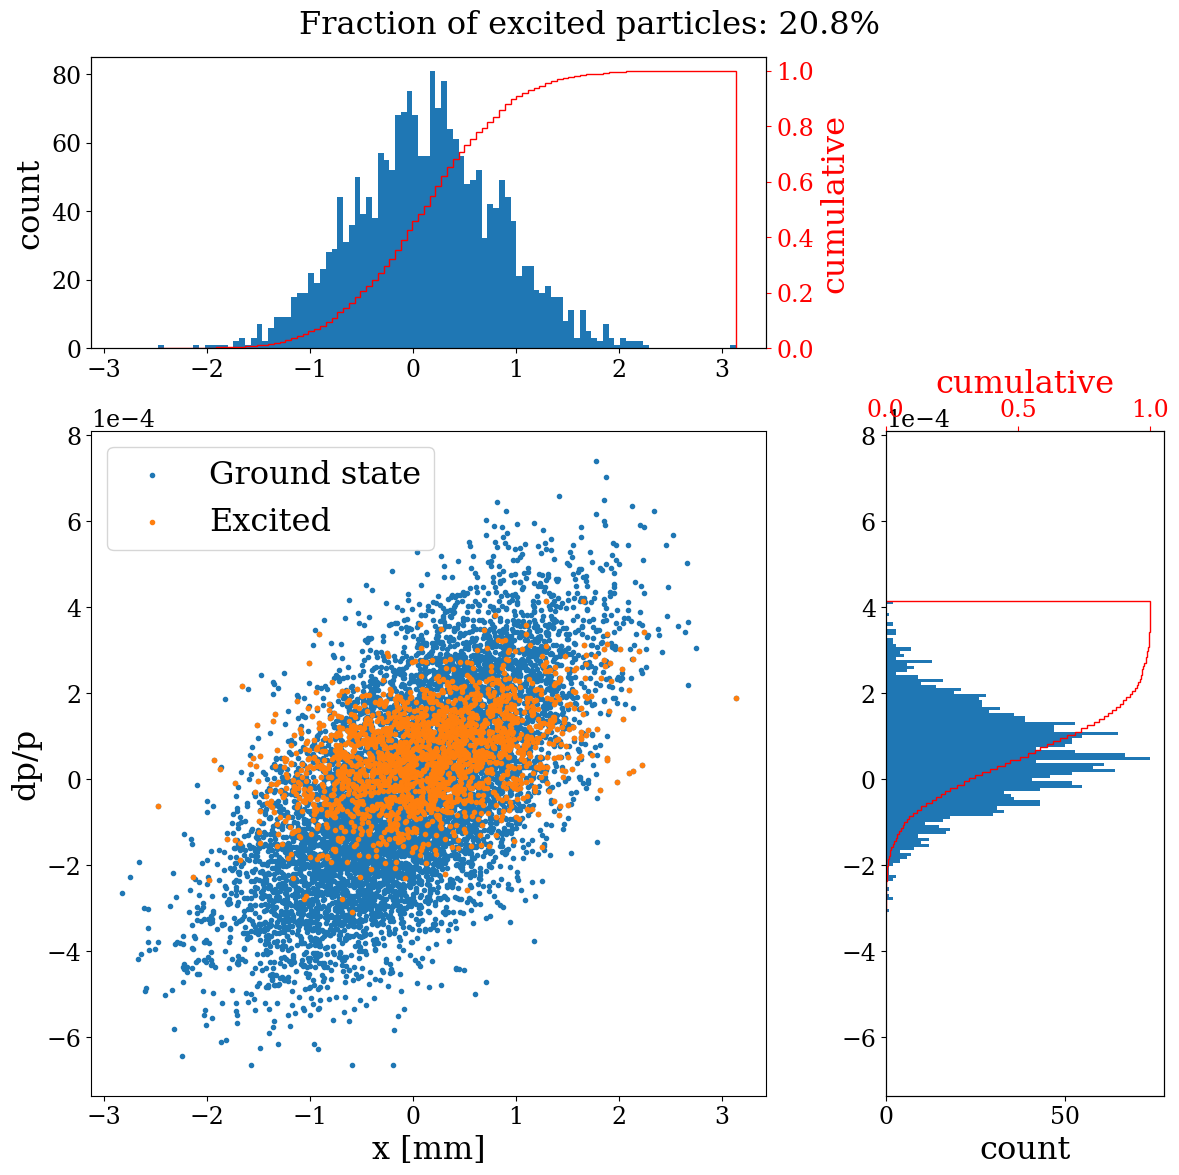

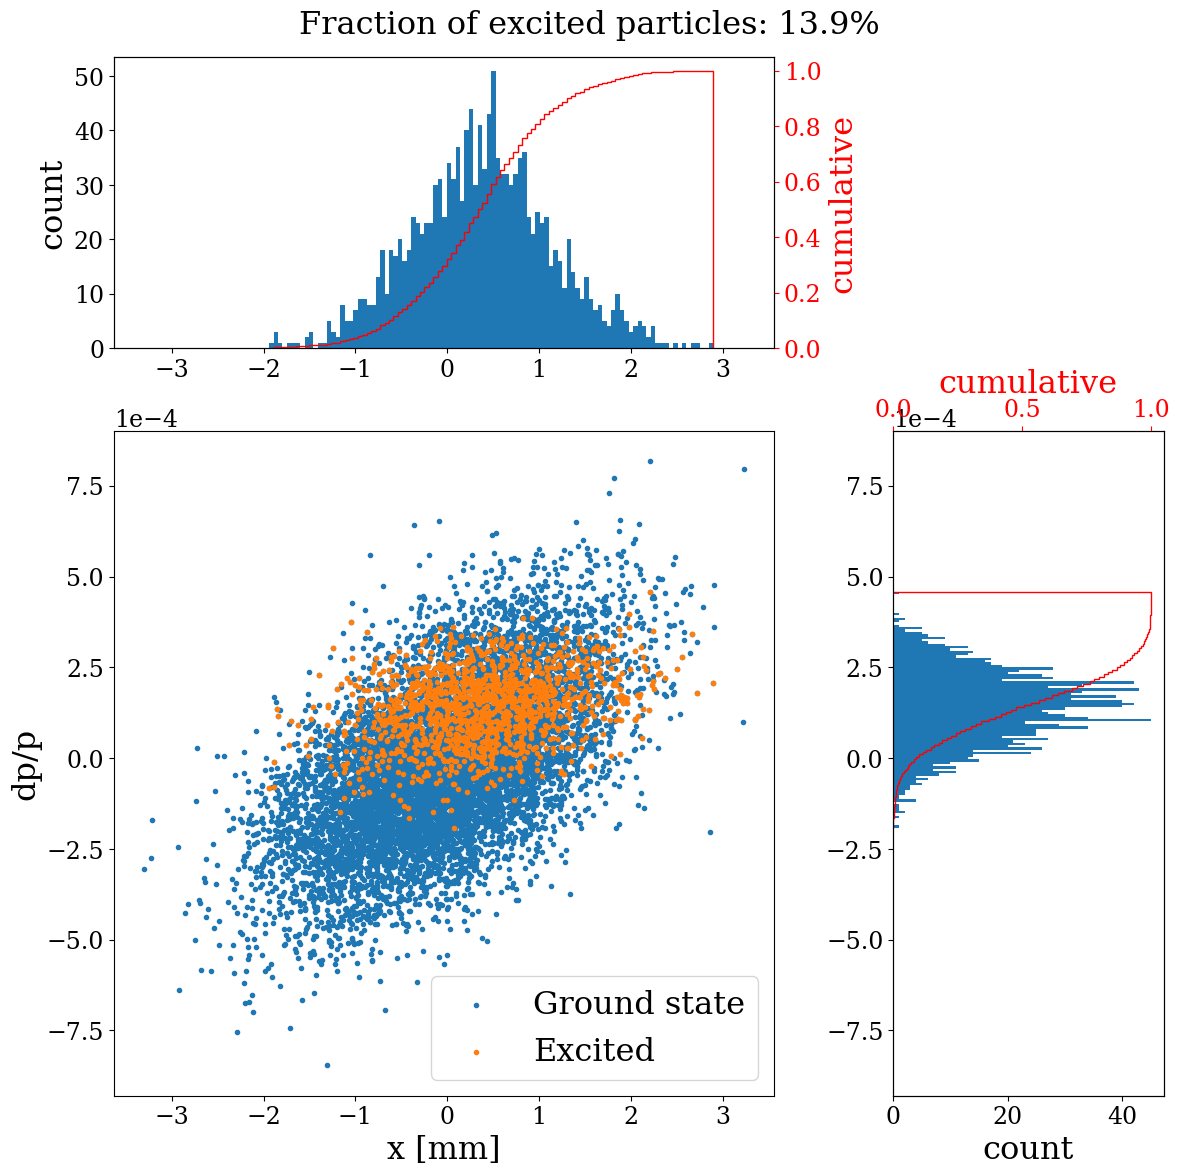

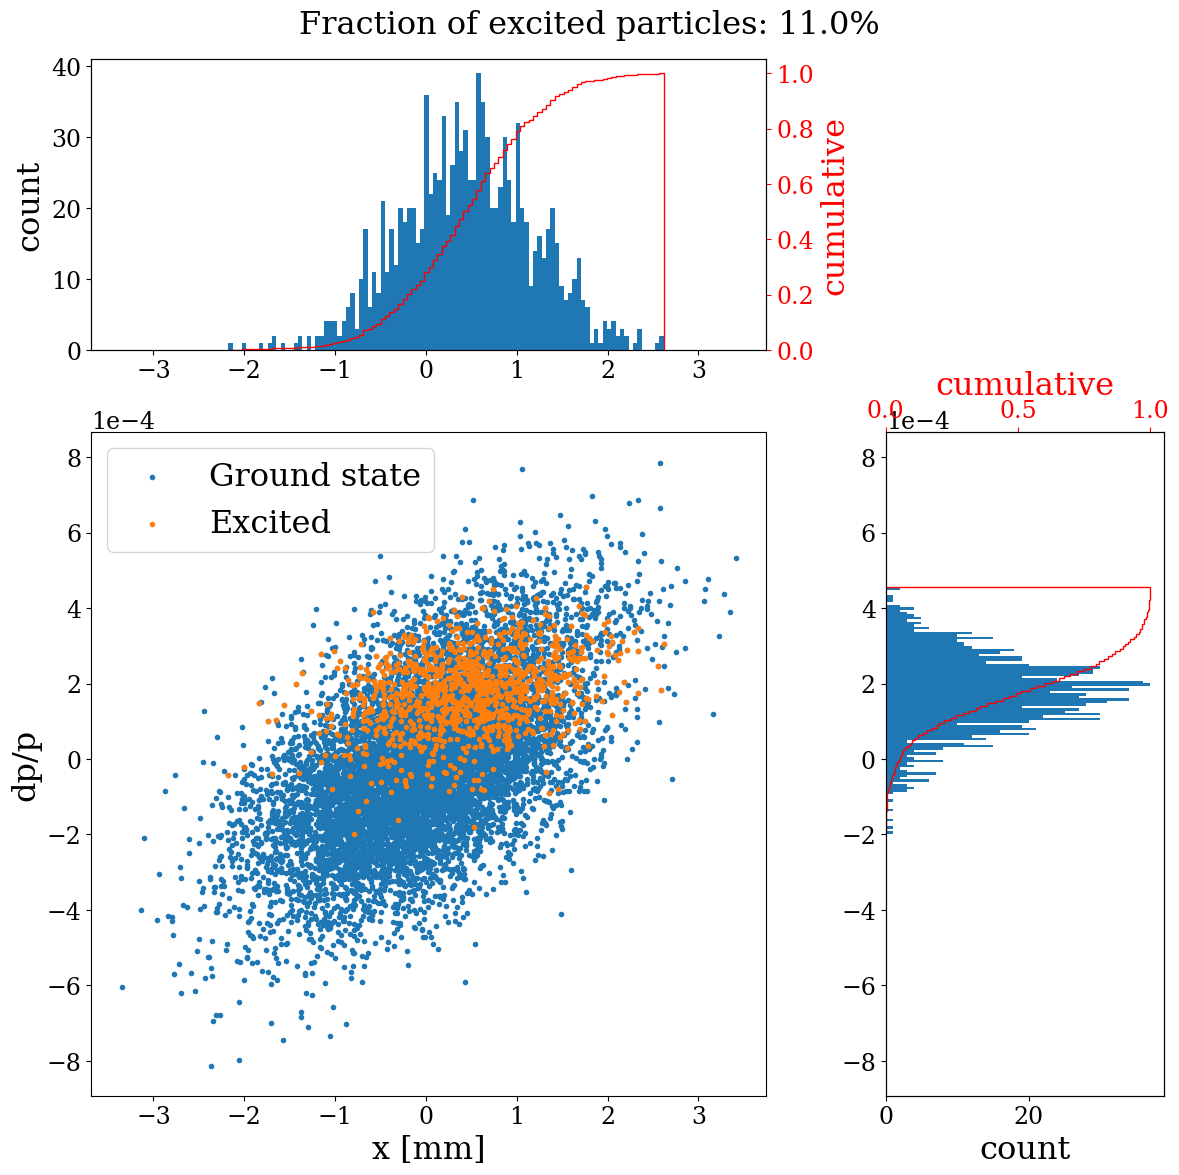

In [1116]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

for i, ion_loop in enumerate([calcium]):

    loaded_data = np.load(f'../linear_lattice/results/cooling_rates/longitudinal/{ion_loop.name}2.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x']
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']

    excited0 = state[1, :] == 2
    fraction_excitation = sum(excited0) / len(excited0)
    rms_dp_p = np.std(delta, axis=1)


    fig = plt.figure(figsize=(12, 12))
    gs = gridspec.GridSpec(3, 3)
    ax_main = plt.subplot(gs[1:3, :2])
    ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
    ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

    ax_main.scatter(x[1,:]*1e3, delta[1,:], marker='.',label='Ground state')
    ax_main.scatter(x[1,:][excited0]*1e3, delta[1,:][excited0], marker='.',label='Excited')
    ax_main.set(xlabel="x [mm]", ylabel="dp/p")

    ax_main.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

    ax_xDist.hist(x[1,:][excited0]*1e3, bins=100, align='mid')
    ax_xDist.set(ylabel='count')
    ax_xCumDist = ax_xDist.twinx()
    ax_xCumDist.hist(x[1,:][excited0]*1e3, bins=100, cumulative=True, histtype='step', density=True, color='r', align='mid')
    ax_xCumDist.tick_params('y', colors='r')
    ax_xCumDist.set_ylabel('cumulative', color='r')


    ax_yDist.hist(delta[1,:][excited0], bins=100, orientation='horizontal', align='mid')
    ax_yDist.set(xlabel='count')
    ax_yCumDist = ax_yDist.twiny()
    ax_yCumDist.hist(delta[1,:][excited0], bins=100, cumulative=True, histtype='step', density=True, color='r', align='mid', orientation='horizontal')
    ax_yCumDist.tick_params('x', colors='r')
    ax_yCumDist.set_xlabel('cumulative', color='r')

    # Setting tick label format for y-axis
    ax_xDist.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax_xCumDist.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax_main.legend()

    plt.suptitle(f'Fraction of excited particles: {fraction_excitation*100:.3}%')

    plt.tight_layout()
    plt.show()

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

for i, ion_loop in enumerate([xenon]):

    loaded_data = np.load(f'../linear_lattice/results/cooling_rates/longitudinal/{ion_loop.name}4.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x']
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']

    excited0 = state[1, :] == 2
    fraction_excitation = sum(excited0) / len(excited0)
    rms_dp_p = np.std(delta, axis=1)


    fig = plt.figure(figsize=(12, 12))
    gs = gridspec.GridSpec(3, 3)
    ax_main = plt.subplot(gs[1:3, :2])
    ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
    ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

    ax_main.scatter(x[1,:]*1e3, delta[1,:], marker='.',label='Ground state')
    ax_main.scatter(x[1,:][excited0]*1e3, delta[1,:][excited0], marker='.',label='Excited')
    ax_main.set(xlabel="x [mm]", ylabel="dp/p")

    ax_main.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

    ax_xDist.hist(x[1,:][excited0]*1e3, bins=100, align='mid')
    ax_xDist.set(ylabel='count')
    ax_xCumDist = ax_xDist.twinx()
    ax_xCumDist.hist(x[1,:][excited0]*1e3, bins=100, cumulative=True, histtype='step', density=True, color='r', align='mid')
    ax_xCumDist.tick_params('y', colors='r')
    ax_xCumDist.set_ylabel('cumulative', color='r')


    ax_yDist.hist(delta[1,:][excited0], bins=100, orientation='horizontal', align='mid')
    ax_yDist.set(xlabel='count')
    ax_yCumDist = ax_yDist.twiny()
    ax_yCumDist.hist(delta[1,:][excited0], bins=100, cumulative=True, histtype='step', density=True, color='r', align='mid', orientation='horizontal')
    ax_yCumDist.tick_params('x', colors='r')
    ax_yCumDist.set_xlabel('cumulative', color='r')

    # Setting tick label format for y-axis
    ax_xDist.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax_xCumDist.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax_main.legend()

    plt.suptitle(f'Fraction of excited particles: {fraction_excitation*100:.3}%')

    plt.tight_layout()
    plt.show()


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

for i, ion_loop in enumerate([xenon]):

    loaded_data = np.load(f'../linear_lattice/results/cooling_rates/longitudinal/{ion_loop.name}5.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x']
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']

    excited0 = state[1, :] == 2
    fraction_excitation = sum(excited0) / len(excited0)
    rms_dp_p = np.std(delta, axis=1)


    fig = plt.figure(figsize=(12, 12))
    gs = gridspec.GridSpec(3, 3)
    ax_main = plt.subplot(gs[1:3, :2])
    ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
    ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

    ax_main.scatter(x[1,:]*1e3, delta[1,:], marker='.',label='Ground state')
    ax_main.scatter(x[1,:][excited0]*1e3, delta[1,:][excited0], marker='.',label='Excited')
    ax_main.set(xlabel="x [mm]", ylabel="dp/p")

    ax_main.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

    ax_xDist.hist(x[1,:][excited0]*1e3, bins=100, align='mid')
    ax_xDist.set(ylabel='count')
    ax_xCumDist = ax_xDist.twinx()
    ax_xCumDist.hist(x[1,:][excited0]*1e3, bins=100, cumulative=True, histtype='step', density=True, color='r', align='mid')
    ax_xCumDist.tick_params('y', colors='r')
    ax_xCumDist.set_ylabel('cumulative', color='r')


    ax_yDist.hist(delta[1,:][excited0], bins=100, orientation='horizontal', align='mid')
    ax_yDist.set(xlabel='count')
    ax_yCumDist = ax_yDist.twiny()
    ax_yCumDist.hist(delta[1,:][excited0], bins=100, cumulative=True, histtype='step', density=True, color='r', align='mid', orientation='horizontal')
    ax_yCumDist.tick_params('x', colors='r')
    ax_yCumDist.set_xlabel('cumulative', color='r')

    # Setting tick label format for y-axis
    ax_xDist.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax_xCumDist.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax_main.legend()

    plt.suptitle(f'Fraction of excited particles: {fraction_excitation*100:.3}%')

    plt.tight_layout()
    plt.show()

min_laser_offset: -1.3758389261744963


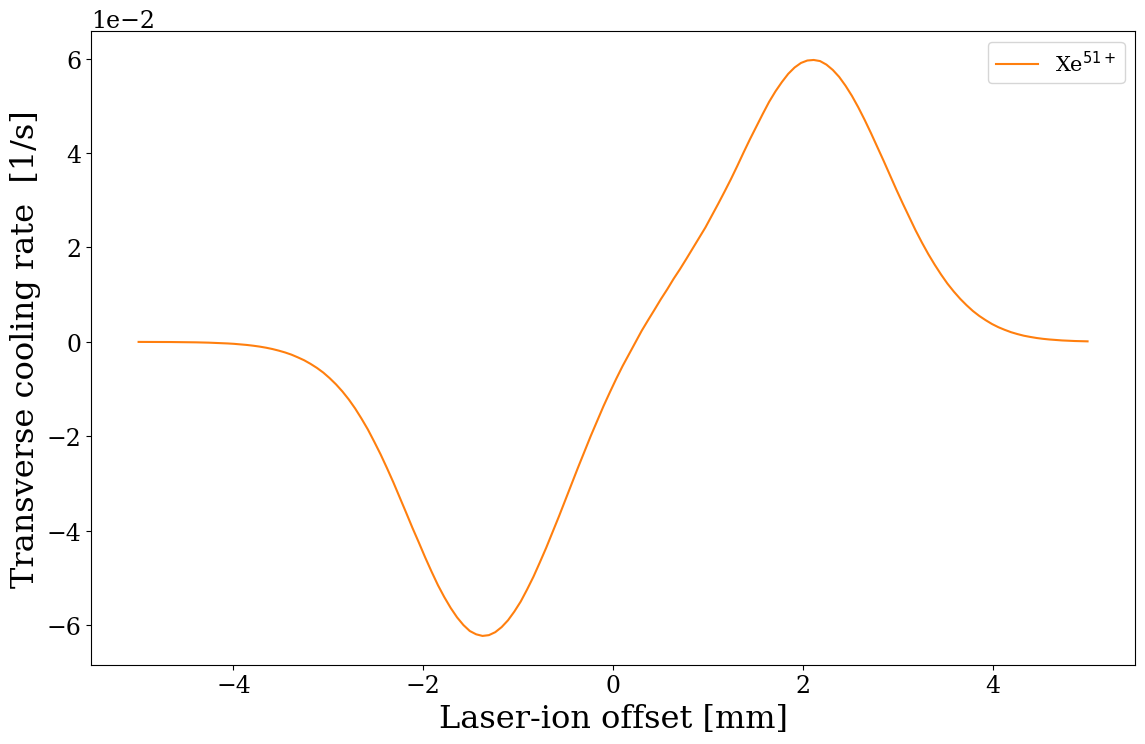

In [1117]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for ion_loop in [xenon]:# Ion properties:       
    data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(final_emittance_list)
    min_emittance = final_emittance_list[min_index]
    min_laser_offset = laser_x_list[min_index]

    print('min_laser_offset:',min_laser_offset*1e3)    
    
    plt.plot(laser_x_list*1e3,transverse_growth_rate_list,label=f'{ion_loop.name}',color=cycle[1])
    #plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal')
    
    plt.xlabel('Laser-ion offset [mm]')
    plt.ylabel('Transverse cooling rate  [1/s]')
    ax = plt.gca()
    # Removing the offset from the y-axis tick labels
    ax.yaxis.get_major_formatter().set_useOffset(False)
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    # plt.axvline(-1.3758389261744963*1e-3,color='red',label='opt. transverse cooling')
    #plt.axvline(-0.5033557046979862*1e-3,color='black',label='counteract IBS')
    plt.legend(fontsize=15)
    # plt.ylim([-0.36,0.35])
plt.tight_layout()
# plt.savefig('Optimal_laser_offset.png', dpi=300)
plt.show()

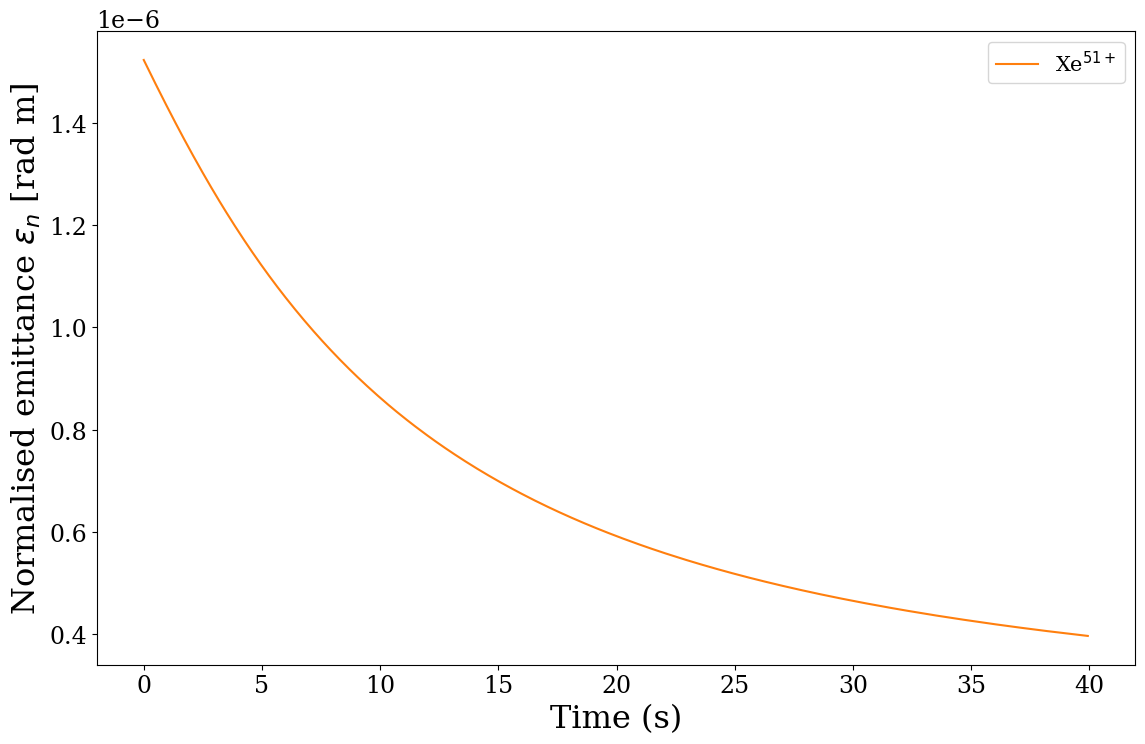

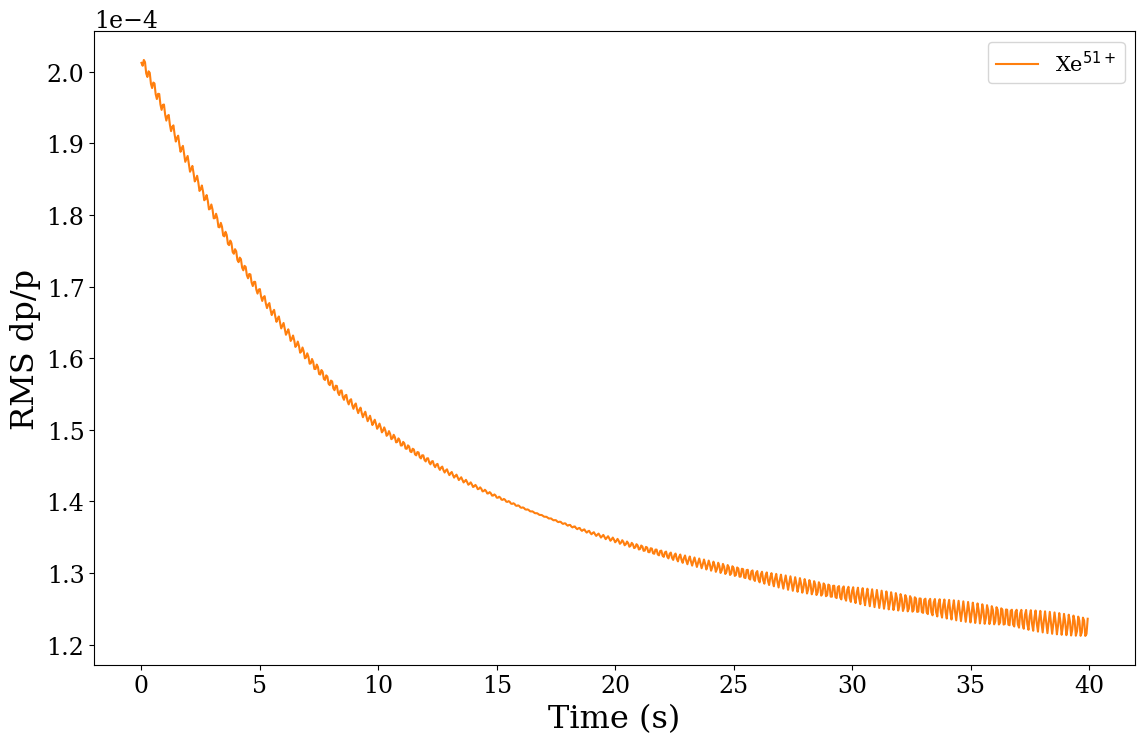

In [1118]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 25})

# Create the first plot
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Normalised emittance $\epsilon_n$ [rad m]')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Create the second plot
fig2, ax2 = plt.subplots(figsize=(12, 8))
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('RMS dp/p')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

for ion_loop in [xenon]:
    loaded_data = np.load(f'../linear_lattice/results/transverse/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x'] 
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p = np.std(delta, axis=1)
    
    # Plot emittance on the first plot
    ax1.plot(time, emittance_x, label=f'{ion_loop.name}',color=cycle[1])
    
    # Plot dp/p on the second plot
    ax2.plot(time, rms_dp_p, label=f'{ion_loop.name}',color=cycle[1])

# Add legends to each plot
ax1.legend(loc='upper right',fontsize=15)
ax2.legend(loc='upper right',fontsize=15)

fig1.tight_layout()
fig2.tight_layout()
# plt.savefig('Laser_cooling_rates.png', dpi=300)
plt.show()


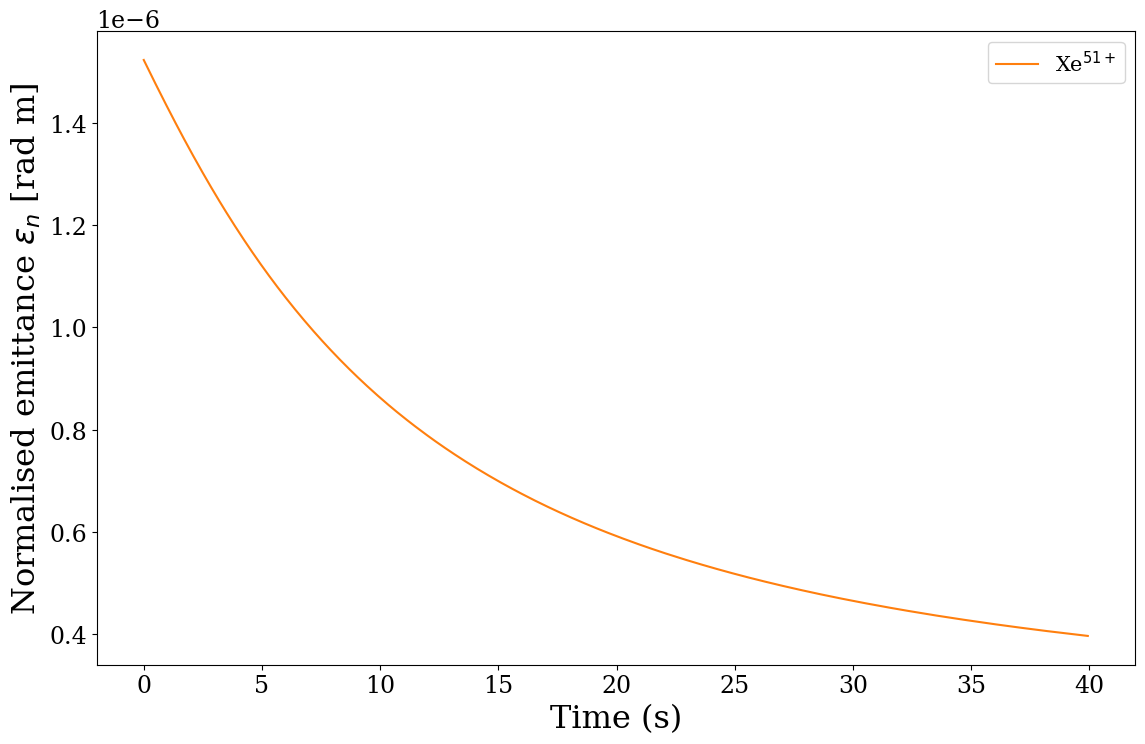

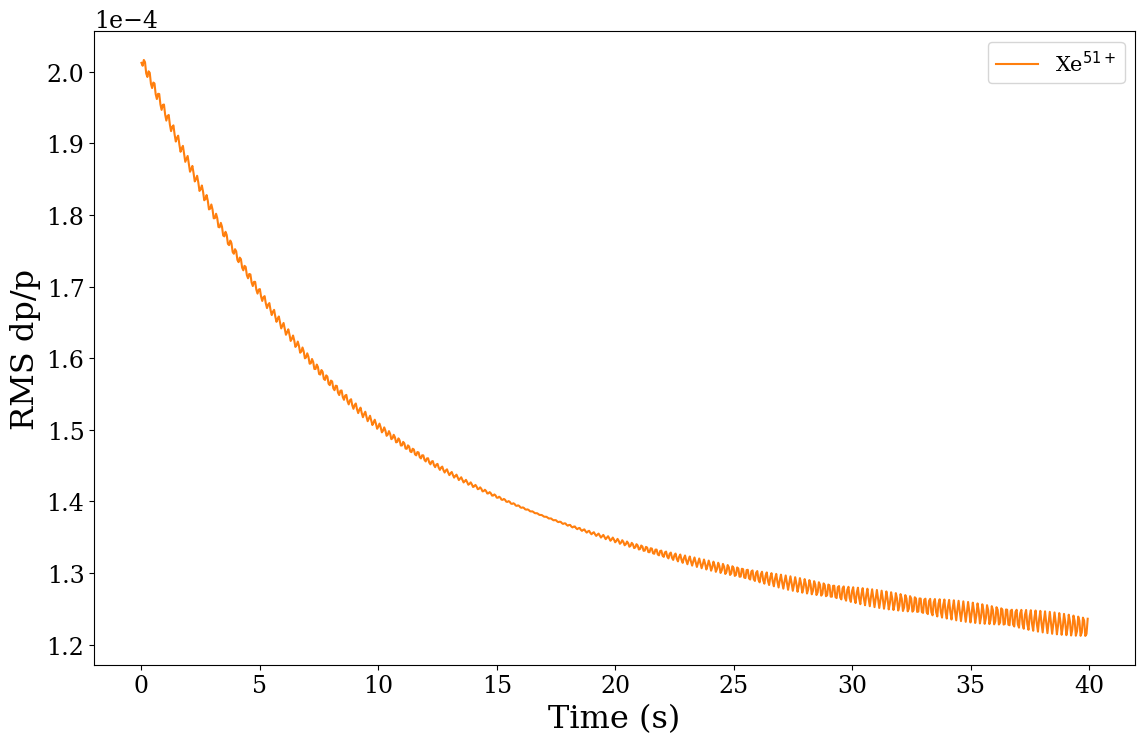

In [1119]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 25})

# Create the first plot
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Normalised emittance $\epsilon_n$ [rad m]')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Create the second plot
fig2, ax2 = plt.subplots(figsize=(12, 8))
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('RMS dp/p')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

for ion_loop in [xenon]:
    loaded_data = np.load(f'../linear_lattice/results/transverse/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x'] 
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p = np.std(delta, axis=1)
    
    # Plot emittance on the first plot
    ax1.plot(time, emittance_x, label=f'{ion_loop.name}',color=cycle[1])
    
    # Plot dp/p on the second plot
    ax2.plot(time, rms_dp_p, label=f'{ion_loop.name}',color=cycle[1])

# Add legends to each plot
ax1.legend(loc='upper right',fontsize=15)
ax2.legend(loc='upper right',fontsize=15)

fig1.tight_layout()
fig2.tight_layout()
# plt.savefig('Laser_cooling_rates.png', dpi=300)
plt.show()


min_laser_offset: -1.2416107382550332
min_laser_offset: -1.3758389261744963
min_laser_offset: -1.577181208053691


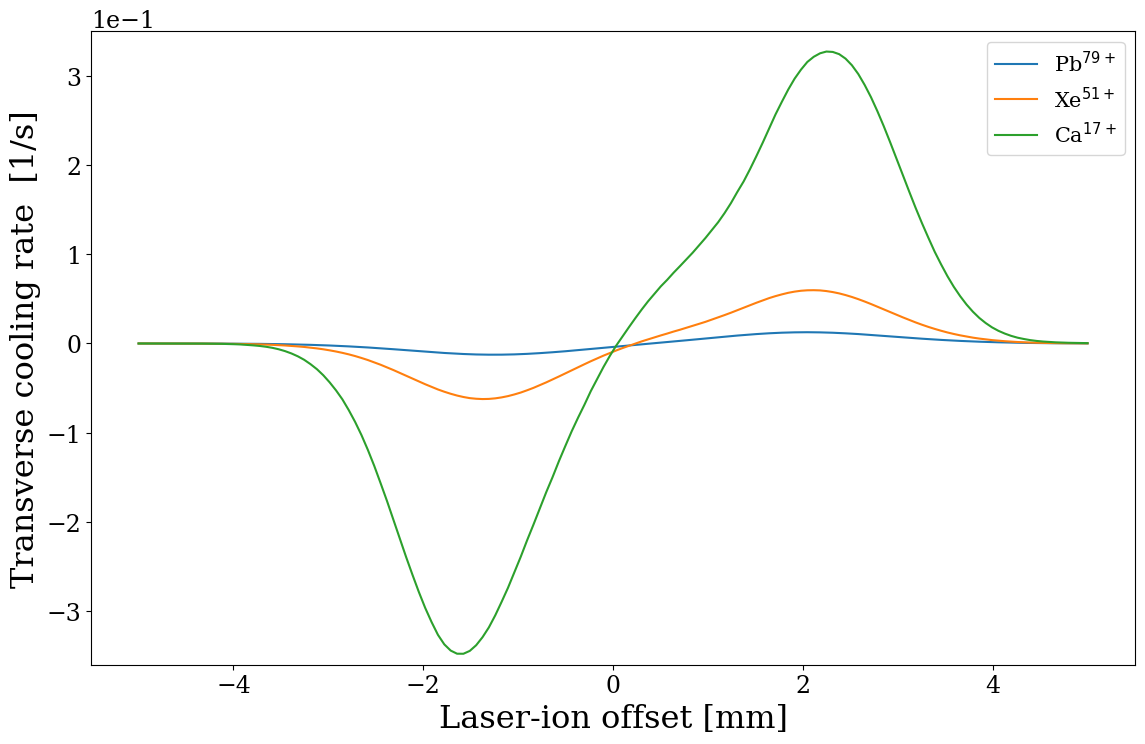

In [1120]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for ion_loop in ions:# Ion properties:       
    data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(final_emittance_list)
    min_emittance = final_emittance_list[min_index]
    min_laser_offset = laser_x_list[min_index]

    print('min_laser_offset:',min_laser_offset*1e3)    
    
    plt.plot(laser_x_list*1e3,transverse_growth_rate_list,label=f'{ion_loop.name}')
    #plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal')
    
    plt.xlabel('Laser-ion offset [mm]')
    plt.ylabel('Transverse cooling rate  [1/s]')
    ax = plt.gca()
    # Removing the offset from the y-axis tick labels
    ax.yaxis.get_major_formatter().set_useOffset(False)
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    # plt.axvline(-1.3758389261744963*1e-3,color='red',label='opt. transverse cooling')
    #plt.axvline(-0.5033557046979862*1e-3,color='black',label='counteract IBS')
    plt.legend(fontsize=15)
    plt.ylim([-0.36,0.35])
plt.tight_layout()
# plt.savefig('Optimal_laser_offset.png', dpi=300)
plt.show()

In [1121]:
# import matplotlib.pyplot as plt
# import numpy as np

# plt.rcParams.update({'font.size': 25})

# # Create the first plot
# fig1, ax1 = plt.subplots(figsize=(12, 8))
# ax1.set_xlabel('Time (s)')
# ax1.set_ylabel('Normalised emittance $\epsilon_n$ [rad m]')
# ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# # Create the second plot
# fig2, ax2 = plt.subplots(figsize=(12, 8))
# ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('RMS dp/p')
# ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# for ion_loop in ions:
#     loaded_data = np.load(f'../linear_lattice/results/transverse/{ion_loop.name}.npz')

#     delta = loaded_data['delta']
#     zeta = loaded_data['zeta']
#     state = loaded_data['state']
#     x = loaded_data['x'] 
#     time = loaded_data['time']
#     s_per_turn = loaded_data['s_per_turn']
#     px = loaded_data['px']
#     action_x = loaded_data['action_x']
#     action_y = loaded_data['action_y']
#     emittance_x = loaded_data['emittance_x']
#     rms_dp_p = np.std(delta, axis=1)

#     # Plot emittance on the first plot
#     ax1.plot(time, emittance_x, label=f'{ion_loop.name}')
    
#     # Plot dp/p on the second plot
#     ax2.plot(time, rms_dp_p, label=f'{ion_loop.name}')

# # Add legends to each plot
# ax1.legend(loc='upper right',fontsize=15)
# ax2.legend(loc='upper right',fontsize=15)

# fig1.tight_layout()
# fig2.tight_layout()
# # plt.savefig('Laser_cooling_rates.png', dpi=300)
# plt.show()


with smoothing

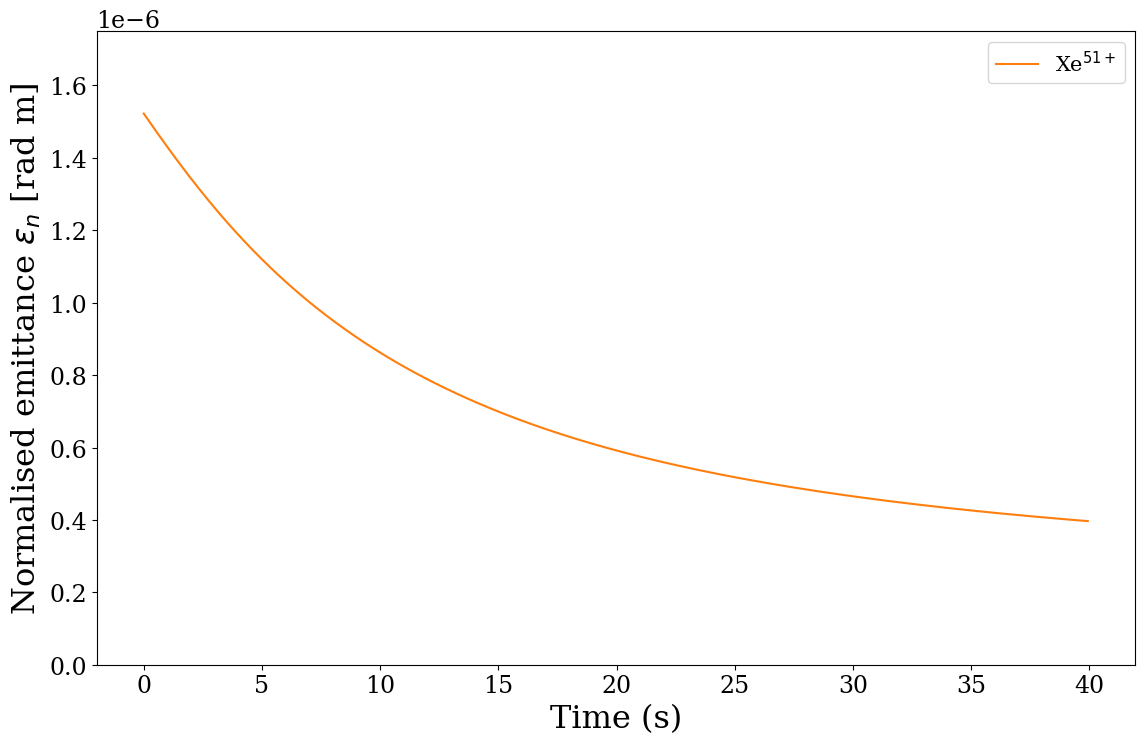

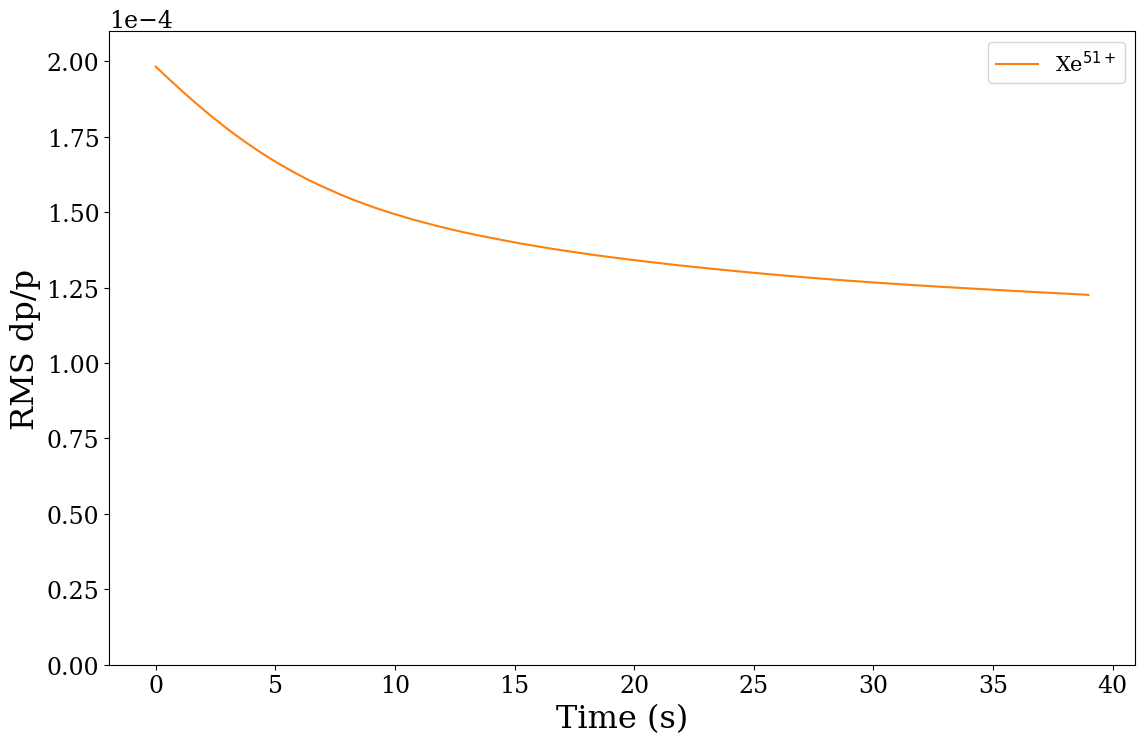

In [1122]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter


plt.rcParams.update({'font.size': 25})

# Create the first plot
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Normalised emittance $\epsilon_n$ [rad m]')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax1.set_ylim([0,1.75e-6])

# Create the second plot
fig2, ax2 = plt.subplots(figsize=(12, 8))
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('RMS dp/p')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax2.set_ylim([0,2.1e-4])


for ion_loop in [xenon]:
    loaded_data = np.load(f'../linear_lattice/results/transverse/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x'] 
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p = np.std(delta, axis=1)

    a=1
    if ion_loop == calcium:
        a=1.05

    window_size = 20  # or any other suitable value
    rms_dp_p_smoothed = np.convolve(rms_dp_p, np.ones(window_size)/window_size, mode='valid')

    # Plot emittance on the first plot
    ax1.plot(time, emittance_x, label=f'{ion_loop.name}',color=cycle[1])
    
    # Smooth out rms_dp_p using a Savitzky-Golay filter
    # smoothed_rms_dp_p = savgol_filter(rms_dp_p, window_length=10, polyorder=2)
    
    # Plot smoothed dp/p on the second plot
    ax2.plot(time[:len(rms_dp_p_smoothed)], a*rms_dp_p_smoothed, label=f'{ion_loop.name}',color=cycle[1])
    

# Add legends to each plot
ax1.legend(loc='upper right', fontsize=15)
ax2.legend(loc='upper right', fontsize=15)

fig1.tight_layout()
fig2.tight_layout()
plt.show()


with worse cooler offset

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


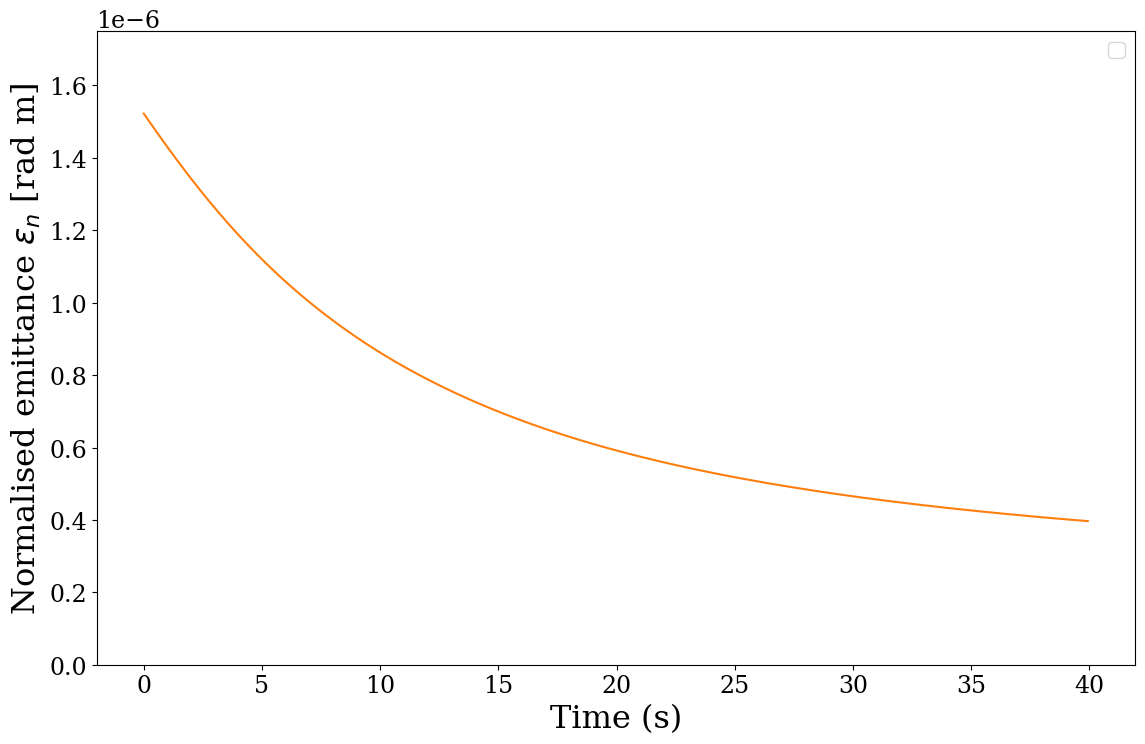

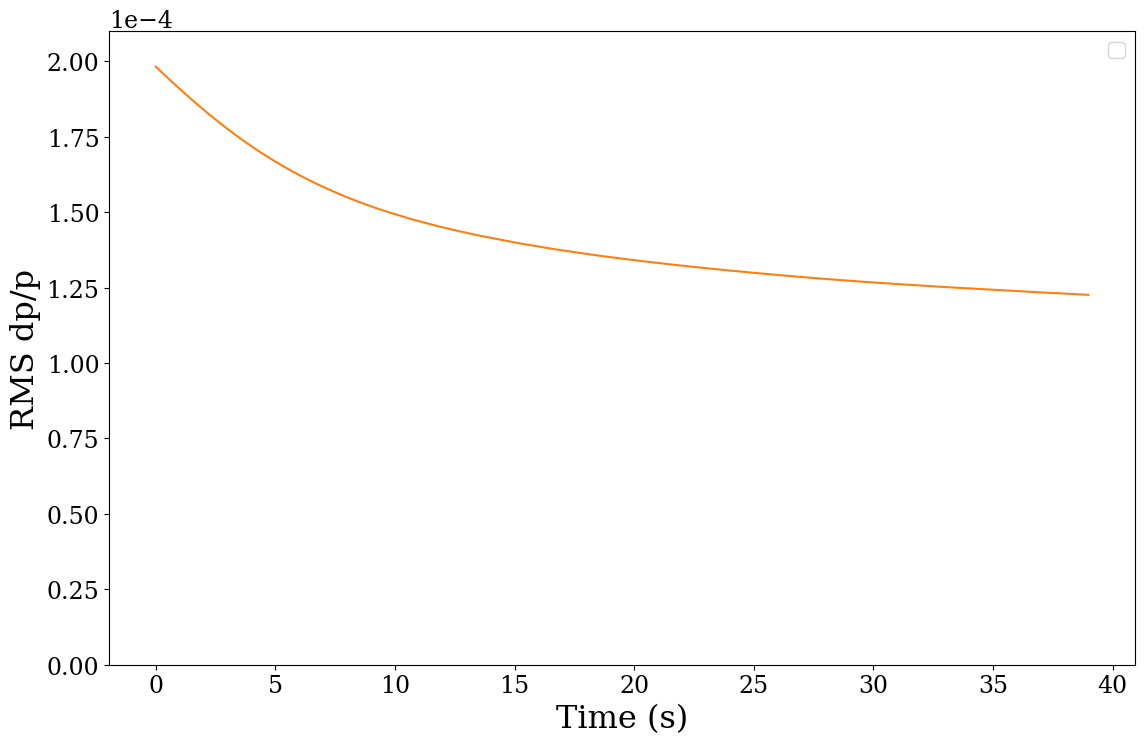

In [1168]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter


plt.rcParams.update({'font.size': 25})

# Create the first plot
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Normalised emittance $\epsilon_n$ [rad m]')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax1.set_ylim([0,1.75e-6])

# Create the second plot
fig2, ax2 = plt.subplots(figsize=(12, 8))
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('RMS dp/p')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax2.set_ylim([0,2.1e-4])


for ion_loop in [xenon]:
    loaded_data = np.load(f'../linear_lattice/results/transverse/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x'] 
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p = np.std(delta, axis=1)

    a=1
    if ion_loop == calcium:
        a=1.05

    window_size = 20  # or any other suitable value
    rms_dp_p_smoothed = np.convolve(rms_dp_p, np.ones(window_size)/window_size, mode='valid')

    # Plot emittance on the first plot
    ax1.plot(time, emittance_x, label=f'',color=cycle[1])
    
    # Smooth out rms_dp_p using a Savitzky-Golay filter
    # smoothed_rms_dp_p = savgol_filter(rms_dp_p, window_length=10, polyorder=2)
    
    # Plot smoothed dp/p on the second plot
    ax2.plot(time[:len(rms_dp_p_smoothed)], a*rms_dp_p_smoothed, label=f'',color=cycle[1])


    loaded_data = np.load(f'../linear_lattice/results/transverse/{ion_loop.name}_worse.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x'] 
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p = np.std(delta, axis=1)

    a=1
    if ion_loop == calcium:
        a=1.05

    window_size = 20  # or any other suitable value
    rms_dp_p_smoothed = np.convolve(rms_dp_p, np.ones(window_size)/window_size, mode='valid')

    # # Plot emittance on the first plot
    # ax1.plot(time, emittance_x, label=f'',color=cycle[0])
    
    # # Smooth out rms_dp_p using a Savitzky-Golay filter
    # # smoothed_rms_dp_p = savgol_filter(rms_dp_p, window_length=10, polyorder=2)
    
    # # Plot smoothed dp/p on the second plot
    # ax2.plot(time[:len(rms_dp_p_smoothed)], a*rms_dp_p_smoothed, label=f'',color=cycle[0])

    

# Add legends to each plot
ax1.legend(loc='upper right', fontsize=15)
ax2.legend(loc='upper right', fontsize=15)

fig1.tight_layout()
fig2.tight_layout()
plt.show()


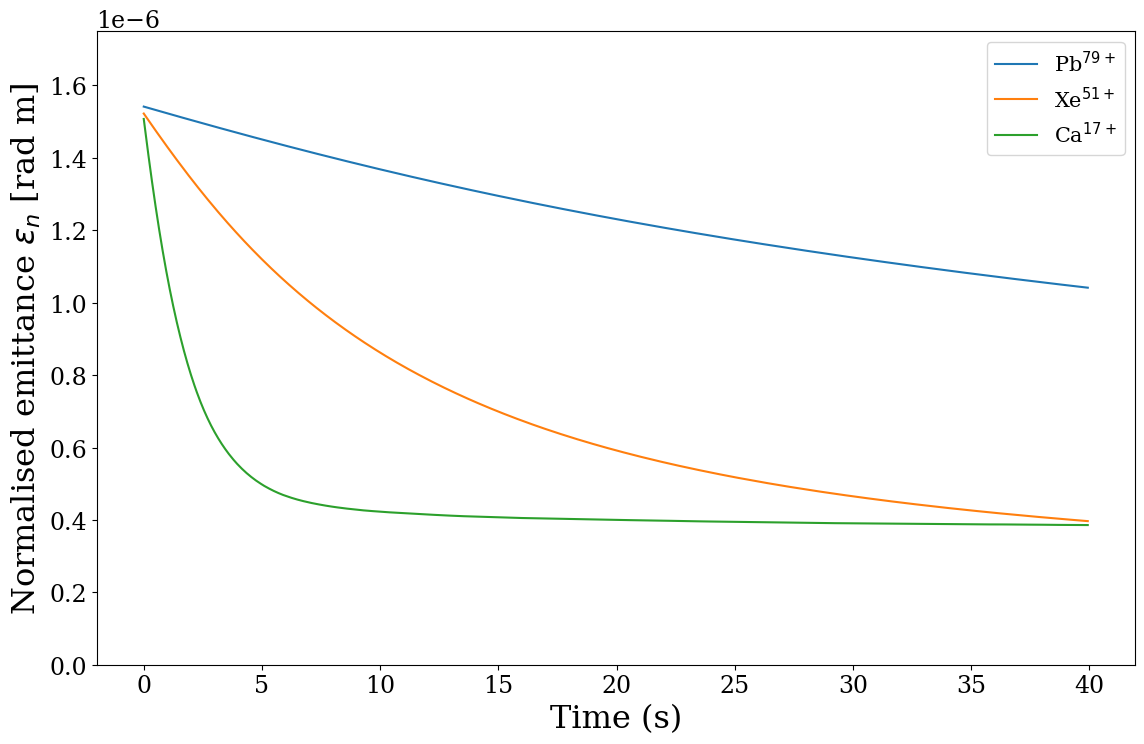

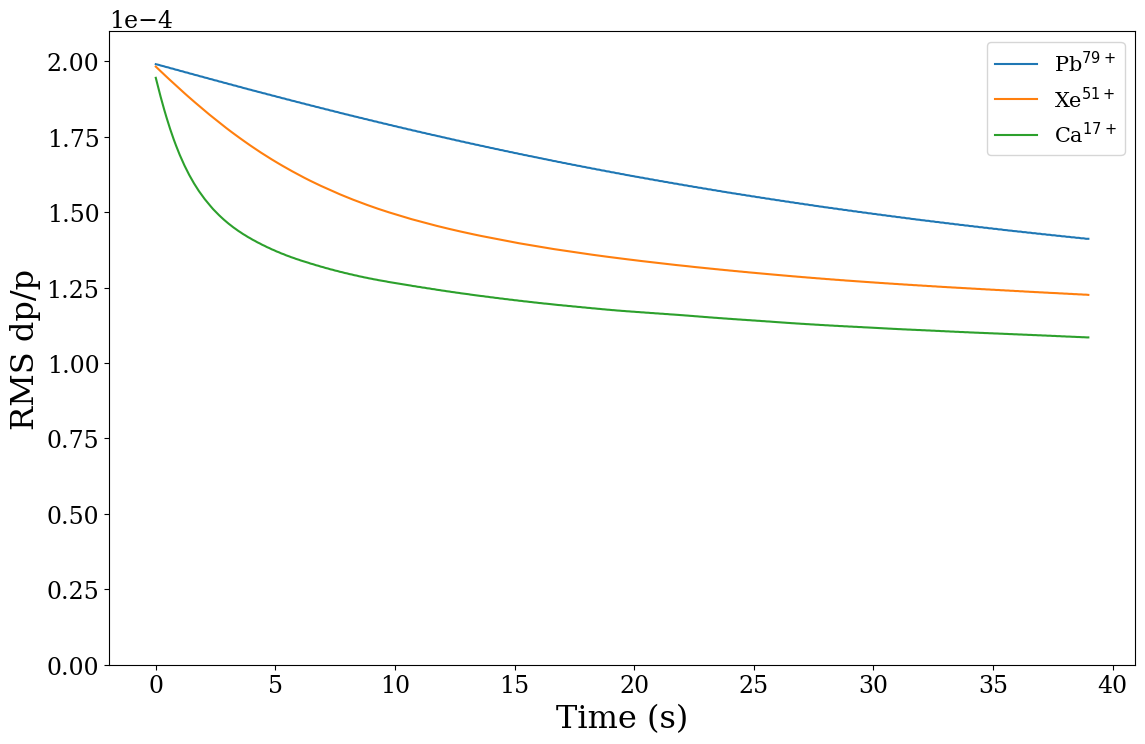

In [1124]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter


plt.rcParams.update({'font.size': 25})

# Create the first plot
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Normalised emittance $\epsilon_n$ [rad m]')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax1.set_ylim([0,1.75e-6])

# Create the second plot
fig2, ax2 = plt.subplots(figsize=(12, 8))
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('RMS dp/p')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax2.set_ylim([0,2.1e-4])


for ion_loop in ions:
    loaded_data = np.load(f'../linear_lattice/results/transverse/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x'] 
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p = np.std(delta, axis=1)

    a=1
    if ion_loop == calcium:
        a=1.05

    window_size = 20  # or any other suitable value
    rms_dp_p_smoothed = np.convolve(rms_dp_p, np.ones(window_size)/window_size, mode='valid')

    # Plot emittance on the first plot
    ax1.plot(time, emittance_x, label=f'{ion_loop.name}')
    
    # Smooth out rms_dp_p using a Savitzky-Golay filter
    # smoothed_rms_dp_p = savgol_filter(rms_dp_p, window_length=10, polyorder=2)
    
    # Plot smoothed dp/p on the second plot
    ax2.plot(time[:len(rms_dp_p_smoothed)], a*rms_dp_p_smoothed, label=f'{ion_loop.name}')
    

# Add legends to each plot
ax1.legend(loc='upper right', fontsize=15)
ax2.legend(loc='upper right', fontsize=15)

fig1.tight_layout()
fig2.tight_layout()
plt.show()


Loop over both sig_delta and emittance

In [1125]:
# # # Load the data from the saved .npz file
# loaded_data = np.load('../linear_lattice/results/cooling_rates.npz')
# transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
# longitudinal_growth_rate=loaded_data['longitudinal_growth_rate']

# # loaded_data = np.load('../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
# # transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
# # longitudinal_growth_rate=loaded_data['longitudinal_growth_rate']



lead zoom in contour plot

In [1126]:
# import numpy as np
# import matplotlib.pyplot as plt
# from tqdm import tqdm

# for i, ion_loop in tqdm(enumerate([lead])):
#     data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')
#     growth_rates_2d_x = data['growth_rates_2d_x']
#     growth_rates_2d_y = data['growth_rates_2d_y']
#     growth_rates_2d_z = data['growth_rates_2d_z']
#     sig_delta_list = data['sig_delta_list']
#     n_emitt_list = data['n_emitt_list']
#     total_intensity = data['total_intensity']

#     plt.figure(figsize=(12, 8))
#     plt.rcParams.update({'font.size': 25})

#     # Plot the contour plot
#     half_height = len(sig_delta_list) // 100
#     half_width = len(n_emitt_list) // 100
#     contour = plt.contourf(n_emitt_list[half_width:], sig_delta_list[half_height:], growth_rates_2d_x[half_height:, half_width:], cmap='viridis')
    
#     cbar = plt.colorbar(contour)
#     cbar.set_label('growth_rates_2d_x', fontsize=20)

#     plt.xlabel('geometrical emittance $\epsilon_x [\mu m]$', fontsize=20)
#     plt.ylabel('RMS dp/p', fontsize=20)
#     plt.title(f'Cooler growth rates: ({ion_loop.name}): {transverse_growth_rate_list[i]:.2f}')
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
#     plt.tight_layout()

#     plt.show()


xenon growth rates

0it [00:00, ?it/s]

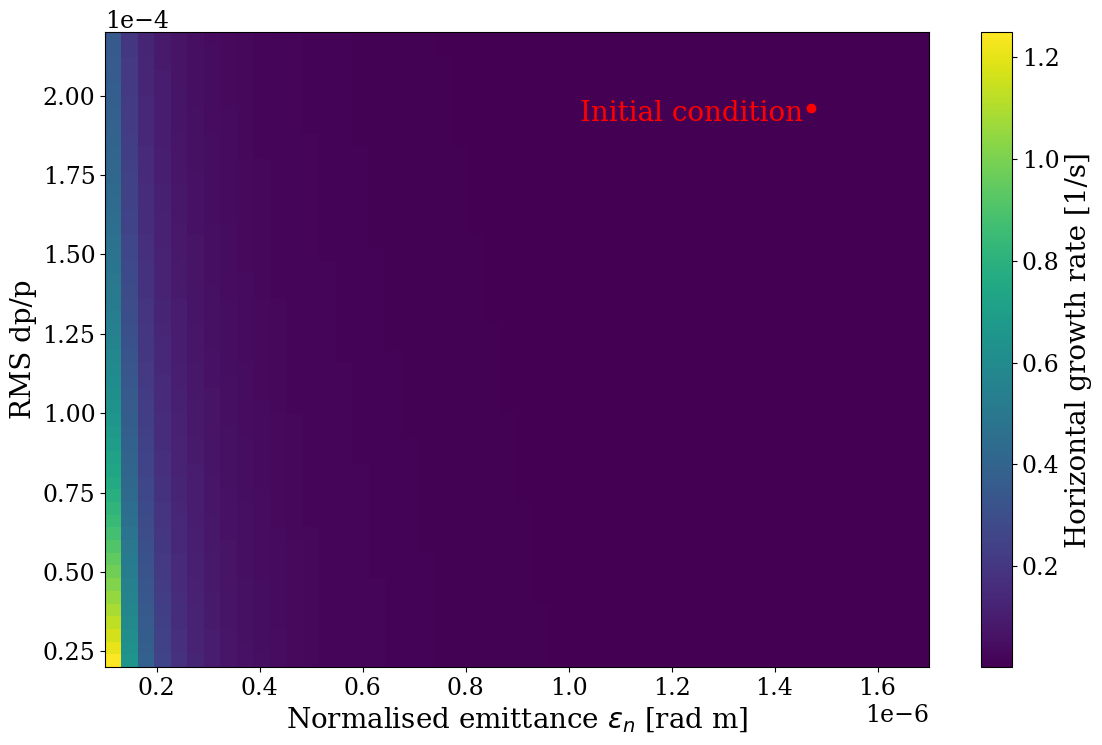

1it [00:00,  3.02it/s]


In [1127]:
injection_nemitt = 1.5*1e-6 # m*rad (normalized emittance)
injection_dp_p = 2e-4

for i,ion_loop in tqdm(enumerate([xenon])):

    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    #max_growth_rate=np.maximum(growth_rates_2d_x,growth_rates_2d_y,growth_rates_2d_z)
    # max_growth_rate = np.maximum.reduce([growth_rates_2d_x, growth_rates_2d_y, growth_rates_2d_z])
    # max_growth_rate=growth_rates_2d_x
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']

    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 25})

    # Plot the heatmap
    plt.imshow(growth_rates_2d_x, extent=[n_emitt_list.min(), n_emitt_list.max(), sig_delta_list[0], sig_delta_list[-1]],
               aspect='auto', origin='lower', cmap='viridis',norm=None)
       
    cbar = plt.colorbar()
    cbar.set_label('Horizontal growth rate [1/s]', fontsize=20)

    # Add injection point
    plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
    plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')

    #contour = plt.contour(geo_epsx_list, sig_delta_list, growth_rates_2d_x, levels=[threshold], colors='red', linewidths=2)
    plt.xlabel('Normalised emittance $\epsilon_n$ [rad m]', fontsize=20)
    plt.ylabel('RMS dp/p', fontsize=20)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    plt.tight_layout()
    # plt.savefig('Lead_cooling_IBS_regime.png', dpi=300)
    plt.show()
    

# print(f'Cooling rate: ({ion_loop.name}): {transverse_growth_rate_list[i]:.2f}')

lead

Transverse growth rate vs Tx

first only xenon

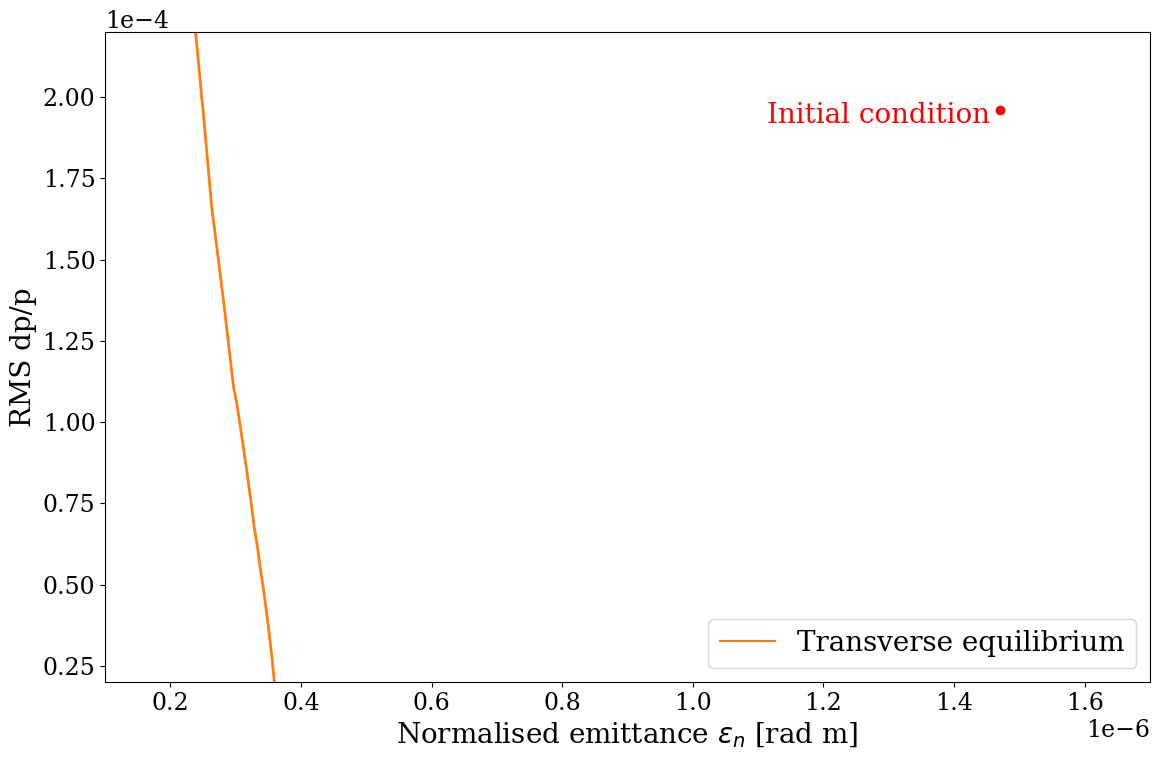

In [1128]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from matplotlib.patches import Patch

from matplotlib.lines import Line2D

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define custom legend handles with Line2D objects
legend_handles = [
    Line2D([0], [0], linestyle='-', color=cycle[1], label='Transverse equilibrium'),
   
]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

for i, ion_loop in enumerate([xenon]):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']

    loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
   
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
   
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                 colors=cycle[1], linewidths=2)

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    
    
    # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
    #              colors=cycle[1], linestyles='--', linewidths=2)
    
    plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
    plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')

plt.xlabel('Normalised emittance $\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(handles=legend_handles, loc='lower right', fontsize='medium')


plt.tight_layout()
# plt.savefig('Equilibrium_emittance.png', dpi=300)
plt.show()

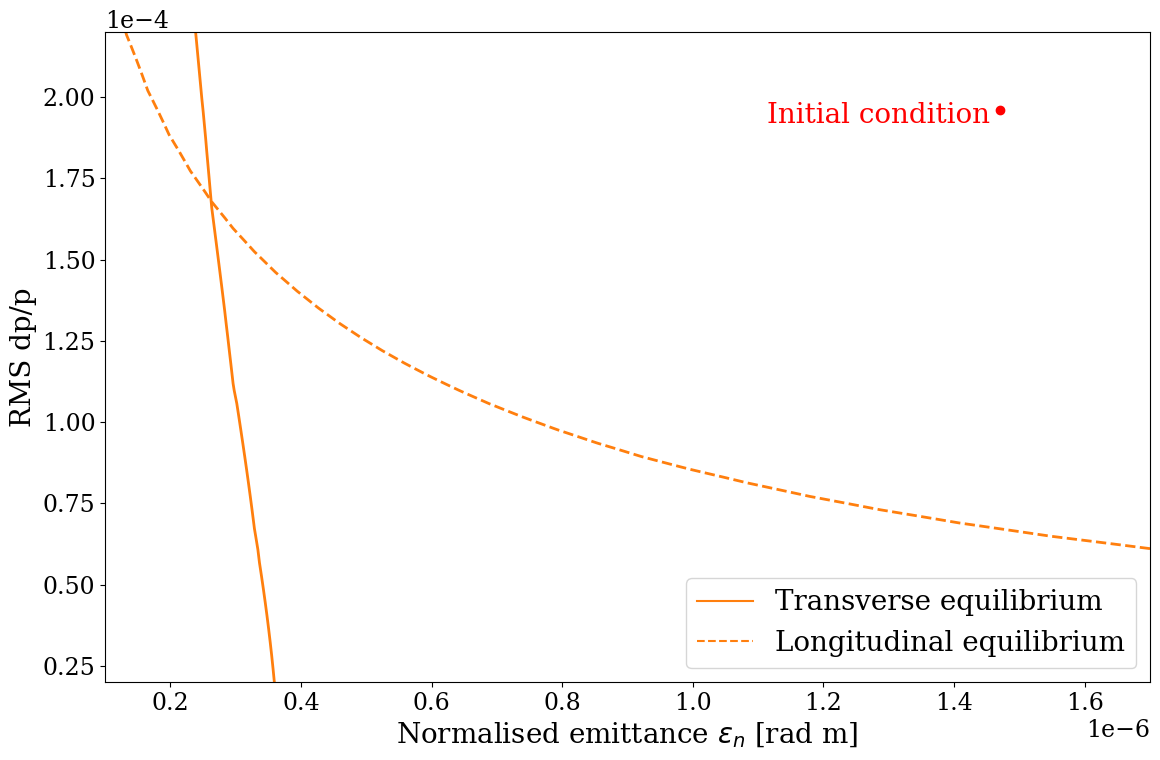

In [1129]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from matplotlib.patches import Patch

from matplotlib.lines import Line2D

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define custom legend handles with Line2D objects
legend_handles = [
    Line2D([0], [0], linestyle='-', color=cycle[1], label='Transverse equilibrium'),
    Line2D([0], [0], linestyle='--', color=cycle[1], label='Longitudinal equilibrium')
]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

for i, ion_loop in enumerate([xenon]):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']

    loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
   
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
   
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                 colors=cycle[1], linewidths=2)

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    
    
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                 colors=cycle[1], linestyles='--', linewidths=2)
    
    plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
    plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')

plt.xlabel('Normalised emittance $\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(handles=legend_handles, loc='lower right', fontsize='medium')


plt.tight_layout()
# plt.savefig('Equilibrium_emittance.png', dpi=300)
plt.show()


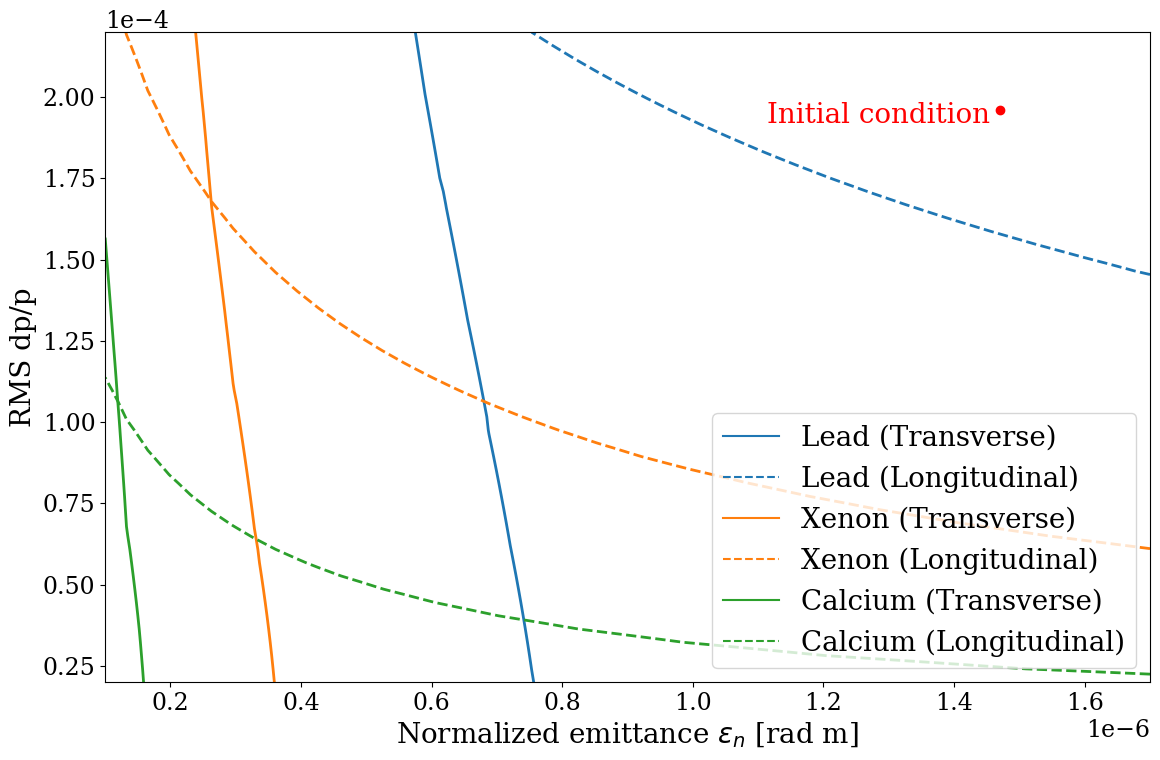

In [1130]:
from tqdm import tqdm
from matplotlib.patches import Patch

from matplotlib.lines import Line2D

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define custom legend handles with Line2D objects
legend_handles = [
    Line2D([0], [0], linestyle='-', color=cycle[0], label='Lead (Transverse)'),
    Line2D([0], [0], linestyle='--', color=cycle[0], label='Lead (Longitudinal)'),
    Line2D([0], [0], linestyle='-', color=cycle[1], label='Xenon (Transverse)'),
    Line2D([0], [0], linestyle='--', color=cycle[1], label='Xenon (Longitudinal)'),
    Line2D([0], [0], linestyle='-', color=cycle[2], label='Calcium (Transverse)'),
    Line2D([0], [0], linestyle='--', color=cycle[2], label='Calcium (Longitudinal)')
]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

for i, ion_loop in enumerate(ions):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
   
    loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
   
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
   
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                 colors=cycle[i], linewidths=2)

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                 colors=cycle[i], linestyles='--', linewidths=2)
    

plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')


plt.xlabel('Normalized emittance $\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(handles=legend_handles, loc='lower right', fontsize='medium')


plt.tight_layout()
plt.savefig('Equilibrium_emittance.png', dpi=300)
plt.show()


in a single line

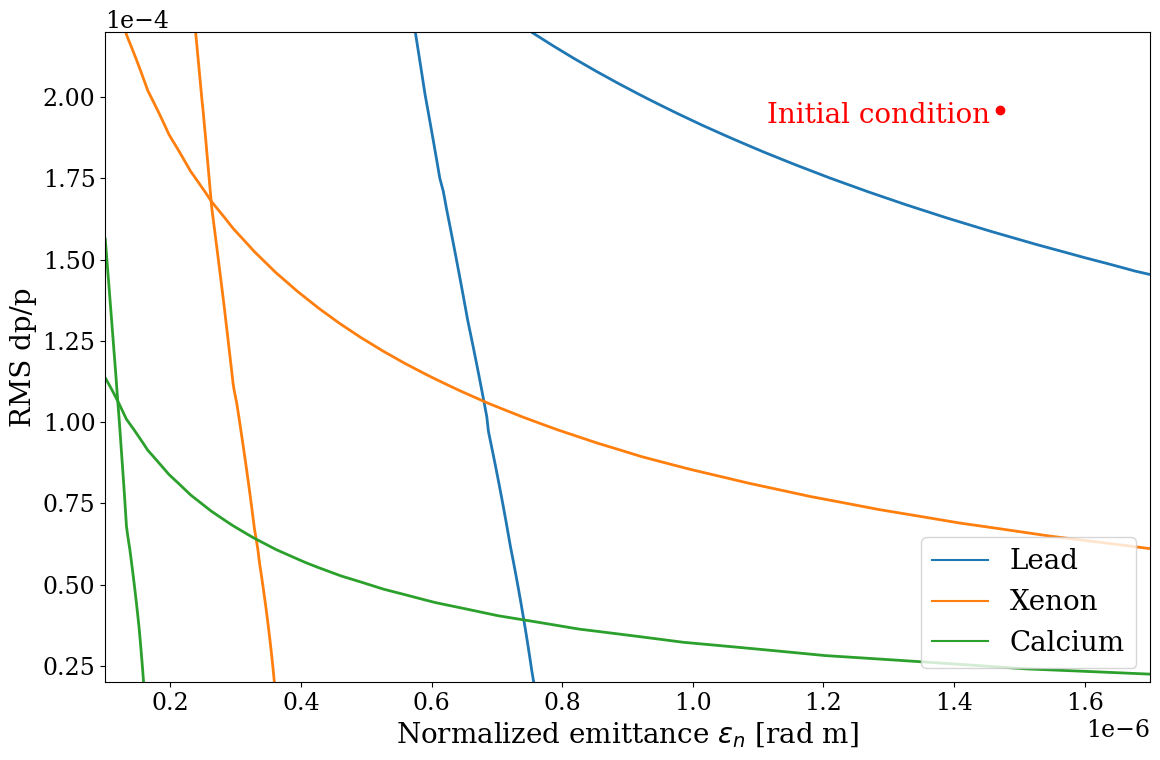

In [1131]:
from tqdm import tqdm
from matplotlib.patches import Patch

from matplotlib.lines import Line2D

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define custom legend handles with Line2D objects
legend_handles = [
    Line2D([0], [0], linestyle='-', color=cycle[0], label='Lead'),
    Line2D([0], [0], linestyle='-', color=cycle[1], label='Xenon'),
    Line2D([0], [0], linestyle='-', color=cycle[2], label='Calcium'),
    ]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

for i, ion_loop in enumerate(ions):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
   
    loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
   
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
   
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                 colors=cycle[i], linewidths=2)

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                 colors=cycle[i], linewidths=2)
    

plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')


plt.xlabel('Normalized emittance $\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(handles=legend_handles, loc='lower right', fontsize='medium')


plt.tight_layout()
plt.savefig('Combined_equilibrium_equilibrium_emittance.png', dpi=300)
plt.show()


Focus on xenon

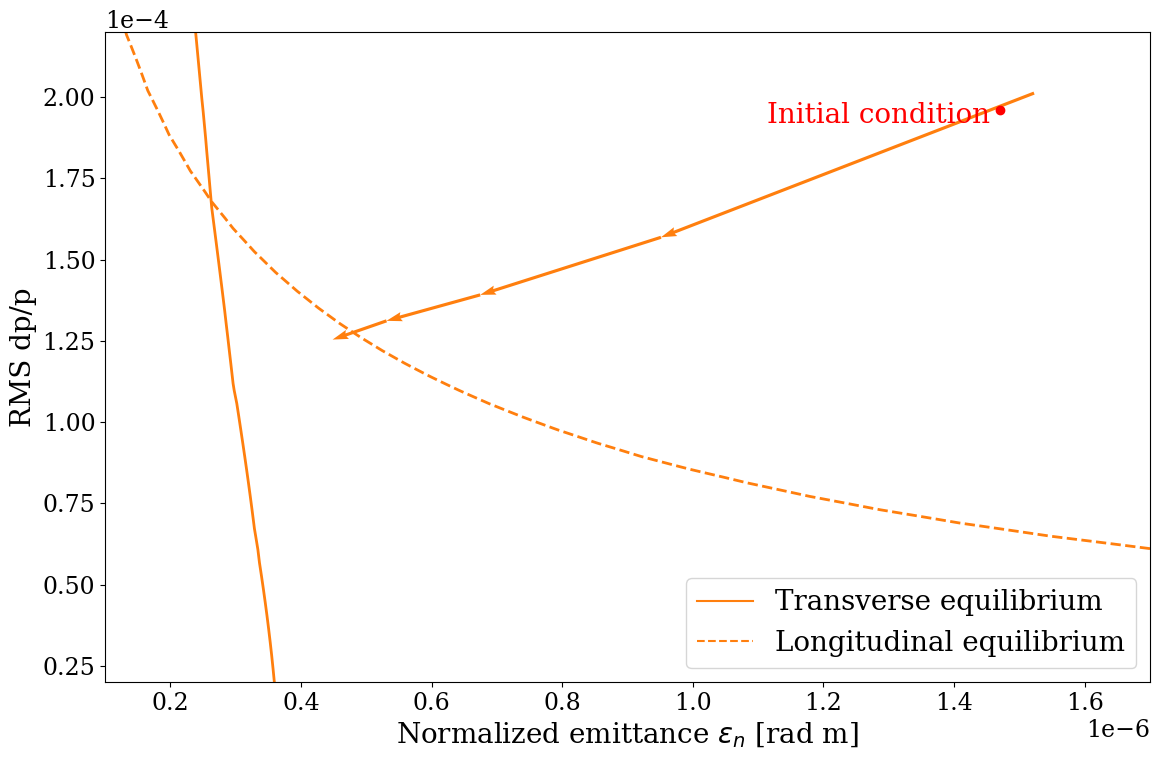

In [1132]:
from tqdm import tqdm
from matplotlib.patches import Patch

from matplotlib.lines import Line2D

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define custom legend handles with Line2D objects
legend_handles = [
    Line2D([0], [0], linestyle='-', color=cycle[1], label='Transverse equilibrium'),
    Line2D([0], [0], linestyle='--', color=cycle[1], label='Longitudinal equilibrium'),    
]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

for i, ion_loop in enumerate([xenon]):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    linear_results = np.load(f'../linear_lattice/results/transverse/{ion_loop.name}.npz')

    delta = linear_results['delta']
    emittance_x = linear_results['emittance_x']
    time=linear_results['time']
    rms_dp_p = np.std(delta, axis=1)

    emittance_x_values = emittance_x[:]
    rms_dp_p_values = rms_dp_p[:]

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
   
    loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
   
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
   
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                 colors=cycle[1], linewidths=2)

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                 colors=cycle[1], linestyles='--', linewidths=2)
    
    # Define the number of segments for each arrow
    num_segments = 5
    
    # Calculate the step size for each segment
    step_size = len(time) // num_segments
    
    # Plot each segment as a quiver plot
    for j in range(num_segments - 1):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = (j + 1) * step_size
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_values[start_idx]
        end_x = emittance_x_values[end_idx]
        
        start_y = rms_dp_p_values[start_idx]
        end_y = rms_dp_p_values[end_idx]
        
        # Plot the quiver plot for the segment
        plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y,
         scale=1, scale_units='xy', angles='xy', color=cycle[1], width=0.003)
    

plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')


plt.xlabel('Normalized emittance $\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(handles=legend_handles, loc='lower right', fontsize='medium')


plt.tight_layout()
plt.savefig('Equilibrium_emittance.png', dpi=300)
plt.show()


with arrow

xenon

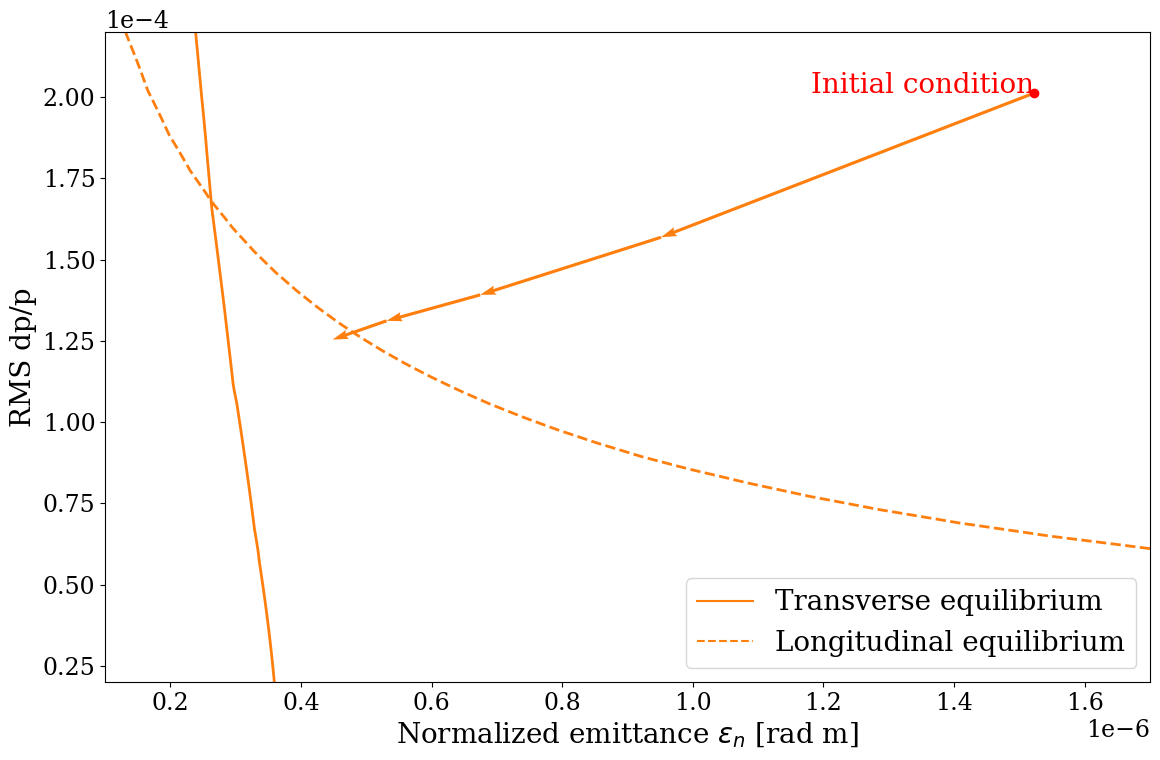

In [1133]:
from tqdm import tqdm
from matplotlib.patches import Patch

from matplotlib.lines import Line2D

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define custom legend handles with Line2D objects
legend_handles = [
    Line2D([0], [0], linestyle='-', color=cycle[1], label='Transverse equilibrium'),
    Line2D([0], [0], linestyle='--', color=cycle[1], label='Longitudinal equilibrium'),    
]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

for i, ion_loop in enumerate([xenon]):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    linear_results = np.load(f'../linear_lattice/results/transverse/{ion_loop.name}.npz')

    delta = linear_results['delta']
    emittance_x = linear_results['emittance_x']
    time=linear_results['time']
    rms_dp_p = np.std(delta, axis=1)

    emittance_x_values = emittance_x[:]
    rms_dp_p_values = rms_dp_p[:]

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
   
    loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
   
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
   
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                 colors=cycle[1], linewidths=2)

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                 colors=cycle[1], linestyles='--', linewidths=2)
    
    # Define the number of segments for each arrow
    num_segments = 5
    
    # Calculate the step size for each segment
    step_size = len(time) // num_segments
    
    # Plot each segment as a quiver plot
    for j in range(num_segments - 1):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = (j + 1) * step_size
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_values[start_idx]
        end_x = emittance_x_values[end_idx]
        
        start_y = rms_dp_p_values[start_idx]
        end_y = rms_dp_p_values[end_idx]
        
        # Plot the quiver plot for the segment
        plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1, scale_units='xy', angles='xy', color=cycle[1], width=0.003)
    

# plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
# plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')

plt.scatter(emittance_x[0], rms_dp_p[0], color='red', label='Injection Point')
plt.text(emittance_x[0], rms_dp_p[0], 'Initial condition', color='red', fontsize=20, ha='right')


plt.xlabel('Normalized emittance $\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(handles=legend_handles, loc='lower right', fontsize='medium')


plt.tight_layout()
plt.savefig('Equilibrium_emittance.png', dpi=300)
plt.show()


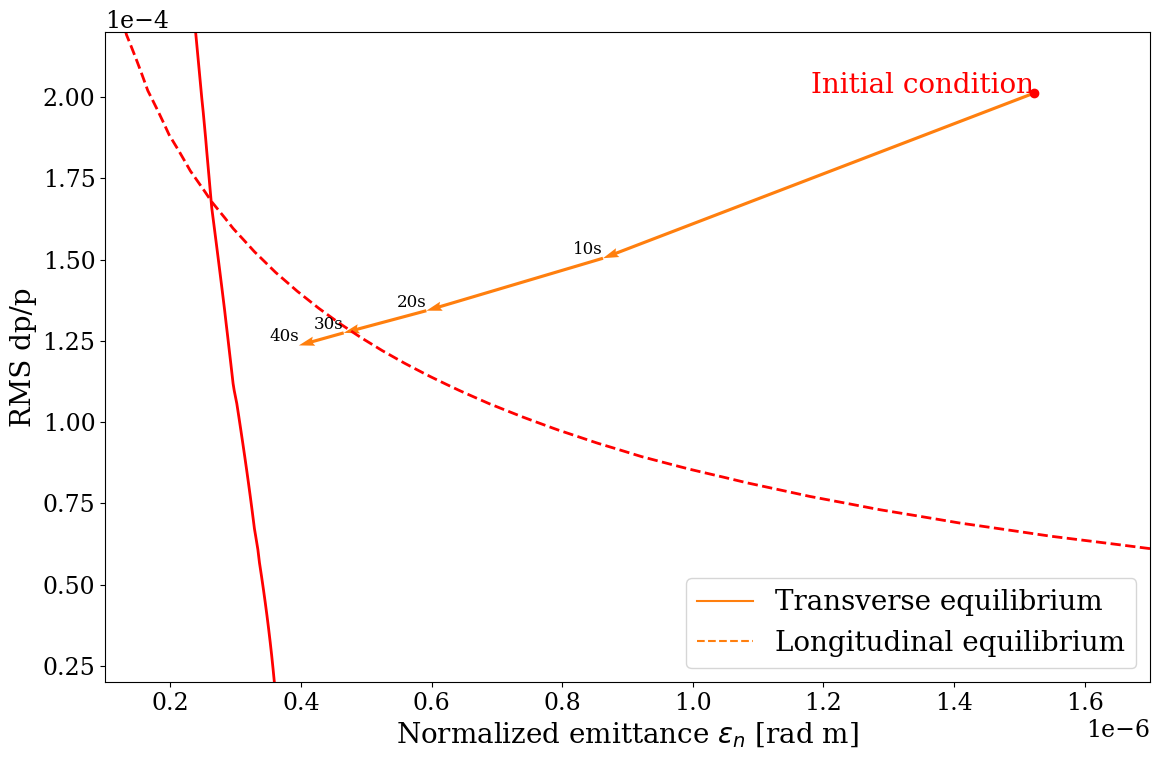

In [1174]:
from tqdm import tqdm
from matplotlib.patches import Patch

from matplotlib.lines import Line2D

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define custom legend handles with Line2D objects
legend_handles = [
    Line2D([0], [0], linestyle='-', color=cycle[1], label='Transverse equilibrium'),
    Line2D([0], [0], linestyle='--', color=cycle[1], label='Longitudinal equilibrium'),    
]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

for i, ion_loop in enumerate([xenon]):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    linear_results = np.load(f'../linear_lattice/results/transverse/{ion_loop.name}.npz')

    delta = linear_results['delta']
    emittance_x = linear_results['emittance_x']
    time=linear_results['time']
    rms_dp_p = np.std(delta, axis=1)

    emittance_x_values = emittance_x[:]
    rms_dp_p_values = rms_dp_p[:]

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
   
    loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
   
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
   
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                 colors='red', linewidths=2)

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                 colors='red', linestyles='--', linewidths=2)
    
    # Define the number of segments for each arrow
    num_segments = 4
    
    # Calculate the step size for each segment
    step_size = len(time) // num_segments
    
   # Plot each segment as a quiver plot
for j in range(num_segments):
    # Calculate the indices for the start and end points of the segment
    start_idx = j * step_size
    end_idx = min((j + 1) * step_size, len(time) - 1)  # Ensure we don't exceed the length of the time array

    # Calculate the start and end points of the segment
    start_x = emittance_x_values[start_idx]
    end_x = emittance_x_values[end_idx]

    start_y = rms_dp_p_values[start_idx]
    end_y = rms_dp_p_values[end_idx]

    # Plot the quiver plot for the segment
    plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1, scale_units='xy', angles='xy', color=cycle[1], width=0.003)


# plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
# plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')

plt.scatter(emittance_x[0], rms_dp_p[0], color='red', label='Injection Point')
plt.text(emittance_x[0], rms_dp_p[0], 'Initial condition', color='red', fontsize=20, ha='right')

# Annotate time points
time_points = [10, 20, 30, 40]  # Adjust time points as needed
for t in time_points:
    idx = np.argmin(np.abs(time - t))  # Find the index of the nearest time point
    plt.text(emittance_x_values[idx], rms_dp_p_values[idx], f'{t}s', color='black', fontsize=12, ha='right', va='bottom')


plt.xlabel('Normalized emittance $\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(handles=legend_handles, loc='lower right', fontsize='medium')


plt.tight_layout()
plt.savefig('Equilibrium_emittance.png', dpi=300)
plt.show()


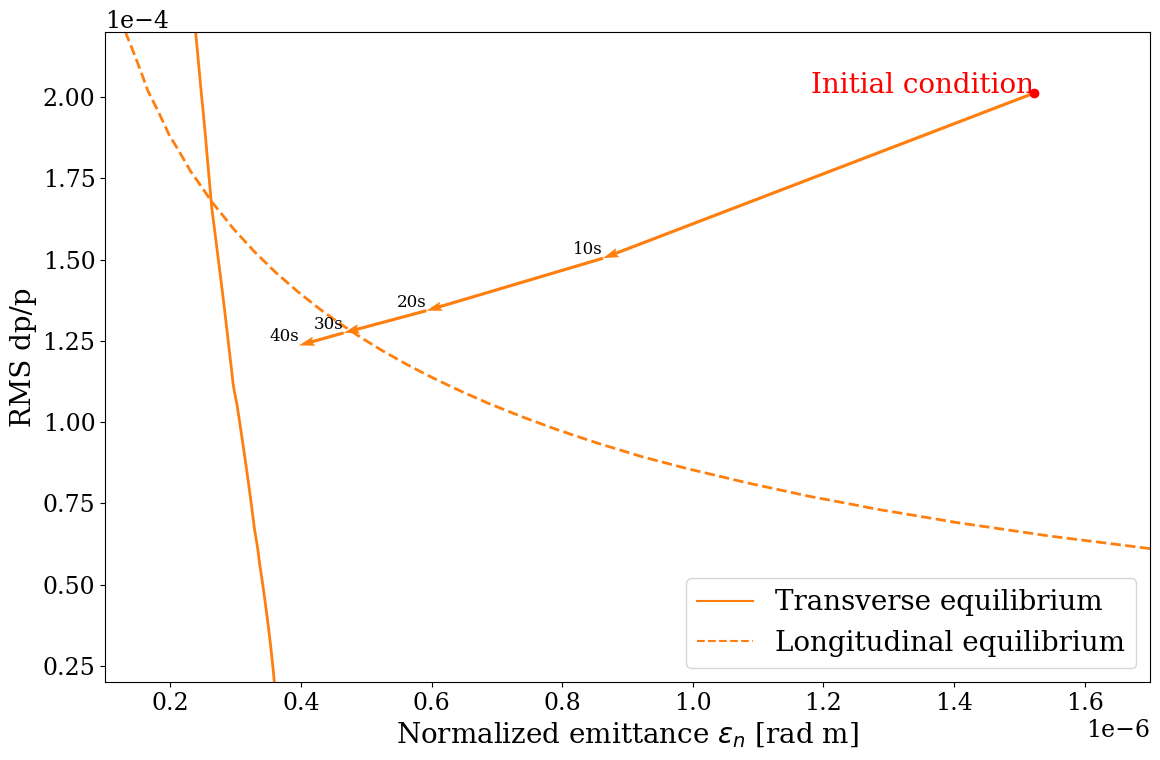

In [1135]:
from tqdm import tqdm
from matplotlib.patches import Patch

from matplotlib.lines import Line2D

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define custom legend handles with Line2D objects
legend_handles = [
    Line2D([0], [0], linestyle='-', color=cycle[1], label='Transverse equilibrium'),
    Line2D([0], [0], linestyle='--', color=cycle[1], label='Longitudinal equilibrium'),    
]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

for i, ion_loop in enumerate([xenon]):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    linear_results = np.load(f'../linear_lattice/results/transverse/{ion_loop.name}.npz')

    delta = linear_results['delta']
    emittance_x = linear_results['emittance_x']
    time=linear_results['time']
    rms_dp_p = np.std(delta, axis=1)

    emittance_x_values = emittance_x[:]
    rms_dp_p_values = rms_dp_p[:]

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
   
    loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
   
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
   
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                 colors=cycle[1], linewidths=2)

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                 colors=cycle[1], linestyles='--', linewidths=2)
    
    # Define the number of segments for each arrow
    num_segments = 4
    
    # Calculate the step size for each segment
    step_size = len(time) // num_segments
    
   # Plot each segment as a quiver plot
for j in range(num_segments):
    # Calculate the indices for the start and end points of the segment
    start_idx = j * step_size
    end_idx = min((j + 1) * step_size, len(time) - 1)  # Ensure we don't exceed the length of the time array

    # Calculate the start and end points of the segment
    start_x = emittance_x_values[start_idx]
    end_x = emittance_x_values[end_idx]

    start_y = rms_dp_p_values[start_idx]
    end_y = rms_dp_p_values[end_idx]

    # Plot the quiver plot for the segment
    plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1, scale_units='xy', angles='xy', color=cycle[1], width=0.003)


# plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
# plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')

plt.scatter(emittance_x[0], rms_dp_p[0], color='red', label='Injection Point')
plt.text(emittance_x[0], rms_dp_p[0], 'Initial condition', color='red', fontsize=20, ha='right')

# Annotate time points
time_points = [10, 20, 30, 40]  # Adjust time points as needed
for t in time_points:
    idx = np.argmin(np.abs(time - t))  # Find the index of the nearest time point
    plt.text(emittance_x_values[idx], rms_dp_p_values[idx], f'{t}s', color='black', fontsize=12, ha='right', va='bottom')


plt.xlabel('Normalized emittance $\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(handles=legend_handles, loc='lower right', fontsize='medium')


plt.tight_layout()
plt.savefig('Equilibrium_emittance.png', dpi=300)
plt.show()


min_laser_offset: -1.3758389261744963


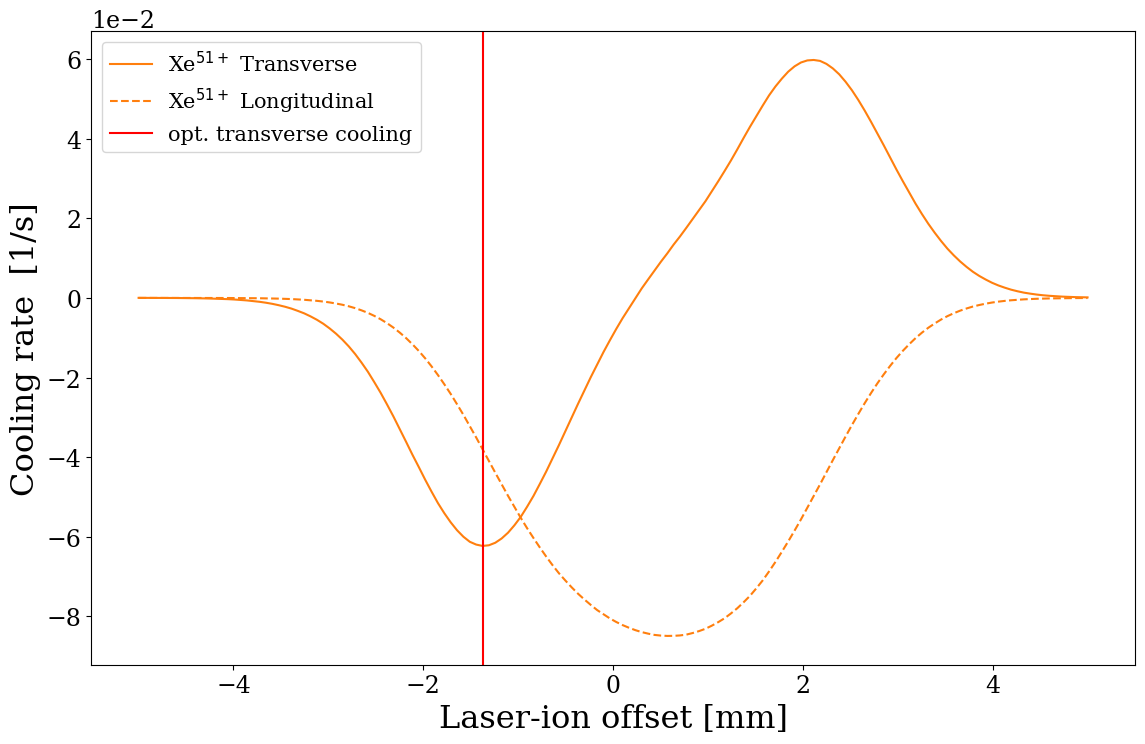

In [1171]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for ion_loop in [xenon]:# Ion properties:       
    data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(final_emittance_list)
    min_emittance = final_emittance_list[min_index]
    min_laser_offset = laser_x_list[min_index]

    print('min_laser_offset:',min_laser_offset*1e3)    
    
    plt.plot(laser_x_list*1e3,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse',color=cycle[1])
    plt.plot(laser_x_list*1e3,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longitudinal',ls='--',color=cycle[1])
    
    plt.xlabel('Laser-ion offset [mm]')
    plt.ylabel('Cooling rate  [1/s]')
    ax = plt.gca()
    # Removing the offset from the y-axis tick labels
    ax.yaxis.get_major_formatter().set_useOffset(False)
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.axvline(-1.3758389261744963,color='red',label='opt. transverse cooling')
    #plt.axvline(-0.5033557046979862*1e-3,color='black',label='counteract IBS')
    plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig('Optimal_laser_offset.png', dpi=300)
plt.show()

min_laser_offset: -1.3758389261744963


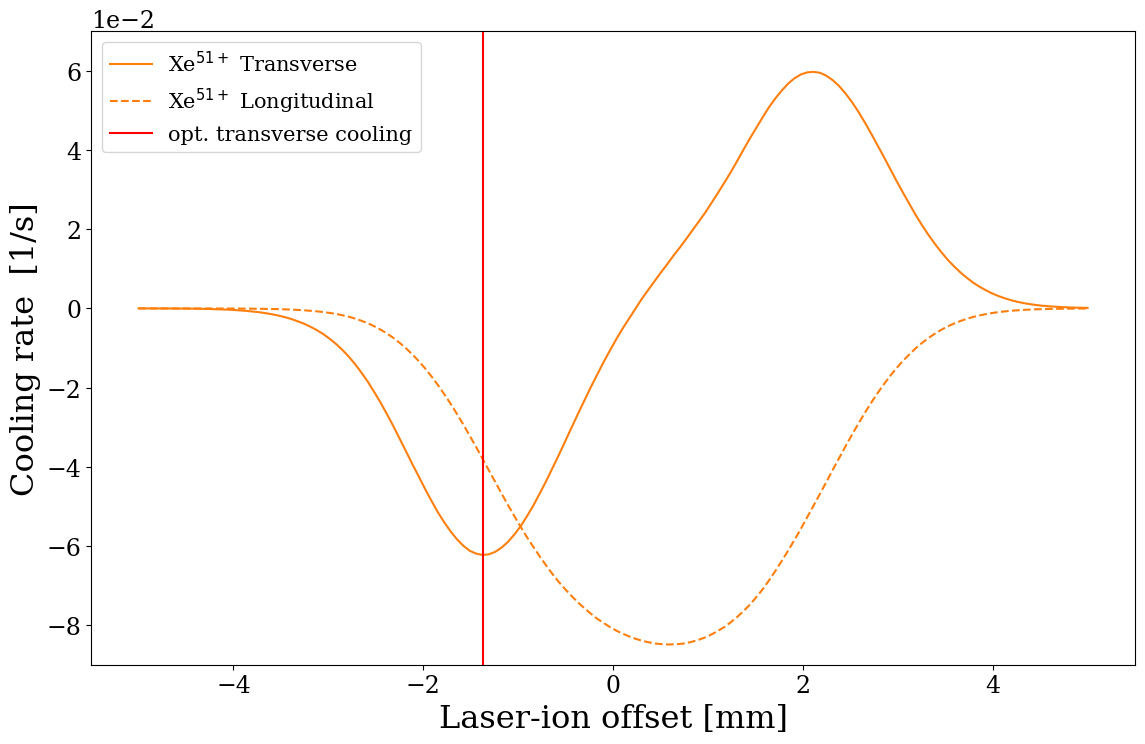

In [1182]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for ion_loop in [xenon]:# Ion properties:       
    data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(final_emittance_list)
    min_emittance = final_emittance_list[min_index]
    min_laser_offset = laser_x_list[min_index]

    print('min_laser_offset:',min_laser_offset*1e3)    
    
    plt.plot(laser_x_list*1e3,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse',color=cycle[1])
    plt.plot(laser_x_list*1e3,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longitudinal',ls='--',color=cycle[1])
    
    plt.xlabel('Laser-ion offset [mm]')
    plt.ylabel('Cooling rate  [1/s]')
    ax = plt.gca()
    # Removing the offset from the y-axis tick labels
    ax.yaxis.get_major_formatter().set_useOffset(False)
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.axvline(-1.3758389261744963,color='red',label='opt. transverse cooling')
    #plt.axvline(-0.5033557046979862*1e-3,color='black',label='counteract IBS')
    plt.legend(fontsize=15)
    plt.ylim([-9*1e-2,7e-2])
plt.tight_layout()
# plt.savefig('Optimal_laser_offset.png', dpi=300)
plt.show()

54
83
laser offset -0.6375838926174493 mm


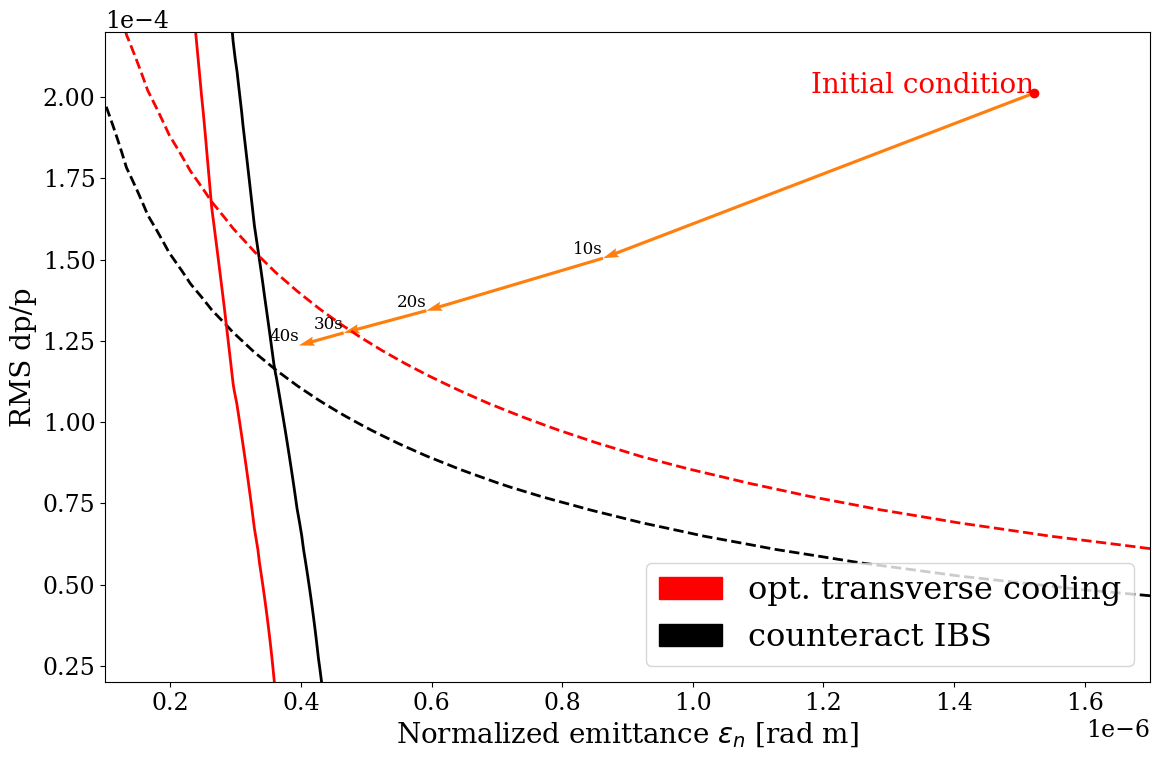

In [1137]:
from tqdm import tqdm
from matplotlib.patches import Patch

from matplotlib.lines import Line2D

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']




plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

for i, ion_loop in enumerate([xenon]):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    linear_results = np.load(f'../linear_lattice/results/transverse/{ion_loop.name}.npz')

    delta = linear_results['delta']
    emittance_x = linear_results['emittance_x']
    time=linear_results['time']
    rms_dp_p = np.std(delta, axis=1)

    emittance_x_values = emittance_x[:]
    rms_dp_p_values = rms_dp_p[:]

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
   
    loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
    laser_x_list=loaded_data['laser_x_list']
      

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    min_longituindal_index = np.argmin(longitudinal_growth_rate_list)
    print(min_transverse_index)
    print(min_longituindal_index)


    laser_position_index = 65
    laser_offset = laser_x_list[laser_position_index]
    print('laser offset',laser_offset*1e3,'mm')
    threshold_longitudinal2 = -longitudinal_growth_rate_list[laser_position_index]  # Set the threshold value
    threshold_transverse2 = -(transverse_growth_rate_list[laser_position_index])  # Set the threshold value
   
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
   
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse2, np.inf],
                    colors='black', linewidths=2)   

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal2],
                    colors='black', linestyles='--', linewidths=2)
    
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                    colors='red', linewidths=2)   

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                    colors='red', linestyles='--', linewidths=2)
    
    # Define the number of segments for each arrow
    num_segments = 4
    
    # Calculate the step size for each segment
    step_size = len(time) // num_segments
    
   # Plot each segment as a quiver plot
for j in range(num_segments):
    # Calculate the indices for the start and end points of the segment
    start_idx = j * step_size
    end_idx = min((j + 1) * step_size, len(time) - 1)  # Ensure we don't exceed the length of the time array

    # Calculate the start and end points of the segment
    start_x = emittance_x_values[start_idx]
    end_x = emittance_x_values[end_idx]

    start_y = rms_dp_p_values[start_idx]
    end_y = rms_dp_p_values[end_idx]

    # Plot the quiver plot for the segment
    plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1, scale_units='xy', angles='xy', color=cycle[1], width=0.003)


# plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
# plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')

plt.scatter(emittance_x[0], rms_dp_p[0], color='red', label='Injection Point')
plt.text(emittance_x[0], rms_dp_p[0], 'Initial condition', color='red', fontsize=20, ha='right')

# Annotate time points
time_points = [10, 20, 30, 40]  # Adjust time points as needed
for t in time_points:
    idx = np.argmin(np.abs(time - t))  # Find the index of the nearest time point
    plt.text(emittance_x_values[idx], rms_dp_p_values[idx], f'{t}s', color='black', fontsize=12, ha='right', va='bottom')


plt.xlabel('Normalized emittance $\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(handles=legend_handles, loc='lower right', fontsize='medium')


# Define custom legend handles with Line2D objects
plt.legend(handles=[
    Patch(color='red', label=f'opt. transverse cooling'),
    Patch(color='black', label=f'counteract IBS'),
    
], loc='lower right')
plt.tight_layout()
plt.savefig('Equilibrium_emittance.png', dpi=300)
plt.show()


min_laser_offset: -1.3758389261744963


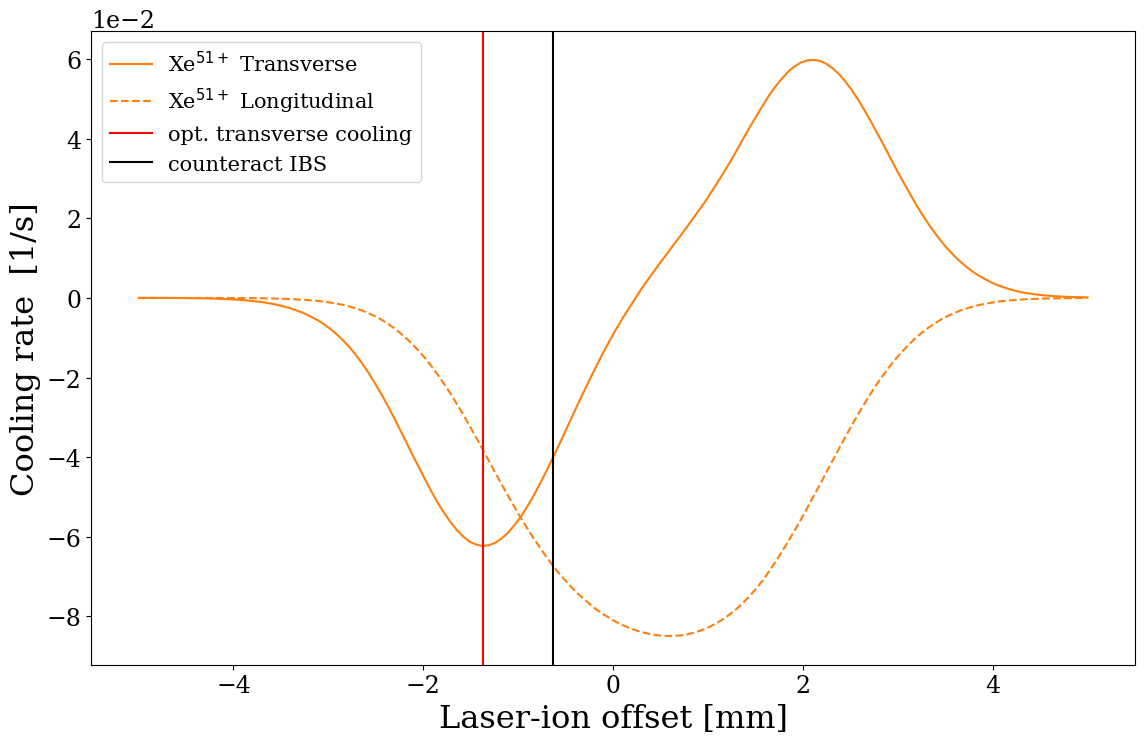

In [1172]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for ion_loop in [xenon]:# Ion properties:       
    data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(final_emittance_list)
    min_emittance = final_emittance_list[min_index]
    min_laser_offset = laser_x_list[min_index]

    print('min_laser_offset:',min_laser_offset*1e3)    
    
    plt.plot(laser_x_list*1e3,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse',color=cycle[1])
    plt.plot(laser_x_list*1e3,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longitudinal',ls='--',color=cycle[1])
    
    plt.xlabel('Laser-ion offset [mm]')
    plt.ylabel('Cooling rate  [1/s]')
    ax = plt.gca()
    # Removing the offset from the y-axis tick labels
    ax.yaxis.get_major_formatter().set_useOffset(False)
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.axvline(-1.3758389261744963,color='red',label='opt. transverse cooling')
    plt.axvline(-0.6375838926174493,color='black',label='counteract IBS')
    plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig('Optimal_laser_offset.png', dpi=300)
plt.show()

In [1139]:
# from tqdm import tqdm
# from matplotlib.patches import Patch
# from matplotlib.lines import Line2D

# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 40})

# cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# for i, ion_loop in tqdm(enumerate([lead])):    
#     data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')
#     linear_results = np.load(f'../linear_lattice/results/transverse/{ion_loop.name}.npz')

#     delta = linear_results['delta']
#     emittance_x = linear_results['emittance_x']
#     time = linear_results['time']
#     rms_dp_p = np.std(delta, axis=1)

#     index_closest_to_40 = np.argmin(np.abs(time - 40))

#     emittance_x_values = emittance_x[:]
#     rms_dp_p_values = rms_dp_p[:]
    
#     # Plot the contour
#     growth_rates_2d_x = data['growth_rates_2d_x']
#     growth_rates_2d_y = data['growth_rates_2d_y']
#     growth_rates_2d_z = data['growth_rates_2d_z']
#     sig_delta_list = data['sig_delta_list']
#     n_emitt_list = data['n_emitt_list']
#     total_intensity = data['total_intensity']
    
#     loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
#     transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
#     longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
#     laser_x_list=loaded_data['laser_x_list']
   
    

#     min_transverse_index = np.argmin(transverse_growth_rate_list)
#     min_longituindal_index = np.argmin(longitudinal_growth_rate_list)
#     print(min_transverse_index)
#     print(min_longituindal_index)


#     laser_position_index = 72
#     laser_offset = laser_x_list[laser_position_index]
#     print('laser offset',laser_offset*1e3,'mm')
#     threshold_longitudinal2 = -longitudinal_growth_rate_list[laser_position_index]  # Set the threshold value
#     threshold_transverse2 = -(transverse_growth_rate_list[laser_position_index])  # Set the threshold value

    
#     plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse2, np.inf],
#                     colors='black', linewidths=2)   

#     plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal2],
#                     colors='black', linestyles='--', linewidths=2)
    
#     threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
#     min_transverse_index = np.argmin(transverse_growth_rate_list)
#     threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    

#     plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
#                     colors='red', linewidths=2)   

#     plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
#                     colors='red', linestyles='--', linewidths=2)


#     # Define the number of segments for each arrow
#     num_segments = 5
    
#     # Calculate the step size for each segment
#     step_size = len(time) // num_segments
    
#     # Plot each segment as a quiver plot
#     for j in range(num_segments - 1):
#         # Calculate the indices for the start and end points of the segment
#         start_idx = j * step_size
#         end_idx = (j + 1) * step_size
        
#         # Calculate the start and end points of the segment
#         start_x = emittance_x_values[start_idx]
#         end_x = emittance_x_values[end_idx]
        
#         start_y = rms_dp_p_values[start_idx]
#         end_y = rms_dp_p_values[end_idx]
        
#         #Plot the quiver plot for the segment
#         plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1, scale_units='xy', angles='xy', color=cycle[i], width=0.003)
   
# #Plotting the arrows on top completes, now let's adjust other settings

# plt.xlim([n_emitt_list[0],n_emitt_list[-1]])
# plt.xlabel('Normalized emittance $\epsilon_n$ [rad m]', fontsize=20)
# plt.ylabel('RMS dp/p', fontsize=20)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# plt.legend(handles=[
    
    
#     Patch(color='red', label=f'opt. transverse cooling'),
#     Patch(color='black', label=f'counteract IBS'),
    
# ], loc='lower right')

# plt.tight_layout()
# plt.savefig('Equilibrium_emittance.png', dpi=300)
# plt.show()


lead

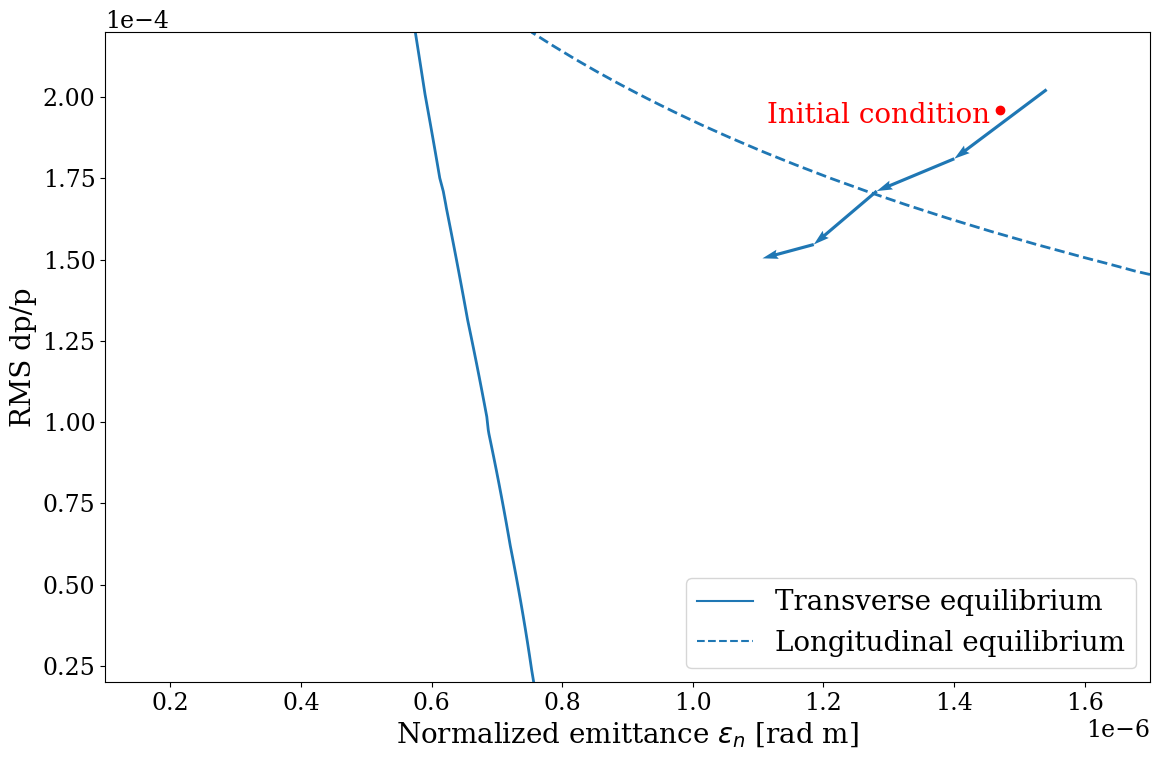

In [1140]:
from tqdm import tqdm
from matplotlib.patches import Patch

from matplotlib.lines import Line2D

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define custom legend handles with Line2D objects
legend_handles = [
    Line2D([0], [0], linestyle='-', color=cycle[0], label='Transverse equilibrium'),
    Line2D([0], [0], linestyle='--', color=cycle[0], label='Longitudinal equilibrium'),    
]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

for i, ion_loop in enumerate([lead]):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    linear_results = np.load(f'../linear_lattice/results/transverse/{ion_loop.name}.npz')

    delta = linear_results['delta']
    emittance_x = linear_results['emittance_x']
    time=linear_results['time']
    rms_dp_p = np.std(delta, axis=1)

    emittance_x_values = emittance_x[:]
    rms_dp_p_values = rms_dp_p[:]

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
   
    loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
   
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
   
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                 colors=cycle[i], linewidths=2)

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                 colors=cycle[i], linestyles='--', linewidths=2)
    
    # Define the number of segments for each arrow
    num_segments = 5
    
    # Calculate the step size for each segment
    step_size = len(time) // num_segments
    
    # Plot each segment as a quiver plot
    for j in range(num_segments - 1):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = (j + 1) * step_size
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_values[start_idx]
        end_x = emittance_x_values[end_idx]
        
        start_y = rms_dp_p_values[start_idx]
        end_y = rms_dp_p_values[end_idx]
        
        # Plot the quiver plot for the segment
        plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1, scale_units='xy', angles='xy', color=cycle[i], width=0.003)
    

plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Initial condition', color='red', fontsize=20, ha='right')


plt.xlabel('Normalized emittance $\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(handles=legend_handles, loc='lower right', fontsize='medium')


plt.tight_layout()
plt.savefig('Equilibrium_emittance.png', dpi=300)
plt.show()


optimal laser offset plots

min_laser_offset: -1.2416107382550332


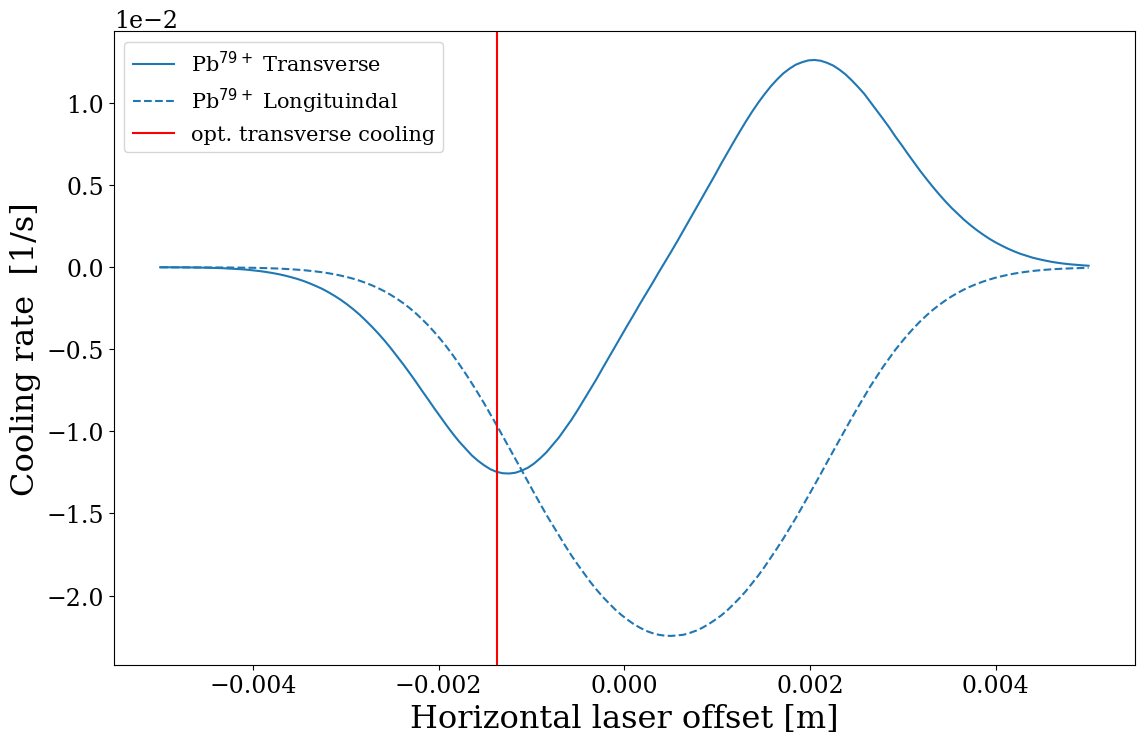

In [1141]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for ion_loop in [lead]:# Ion properties:       
    data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(final_emittance_list)
    min_emittance = final_emittance_list[min_index]
    min_laser_offset = laser_x_list[min_index]

    print('min_laser_offset:',min_laser_offset*1e3)    
    
    plt.plot(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse',color=cycle[0])
    plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal',ls='--',color=cycle[0])
    
    plt.xlabel('Horizontal laser offset [m]')
    plt.ylabel('Cooling rate  [1/s]')
    ax = plt.gca()
    # Removing the offset from the y-axis tick labels
    ax.yaxis.get_major_formatter().set_useOffset(False)
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.axvline(-1.3758389261744963*1e-3,color='red',label='opt. transverse cooling')
    #plt.axvline(-0.5033557046979862*1e-3,color='black',label='counteract IBS')
    plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig('Optimal_laser_offset.png', dpi=300)
plt.show()

min_laser_offset: -1.2416107382550332


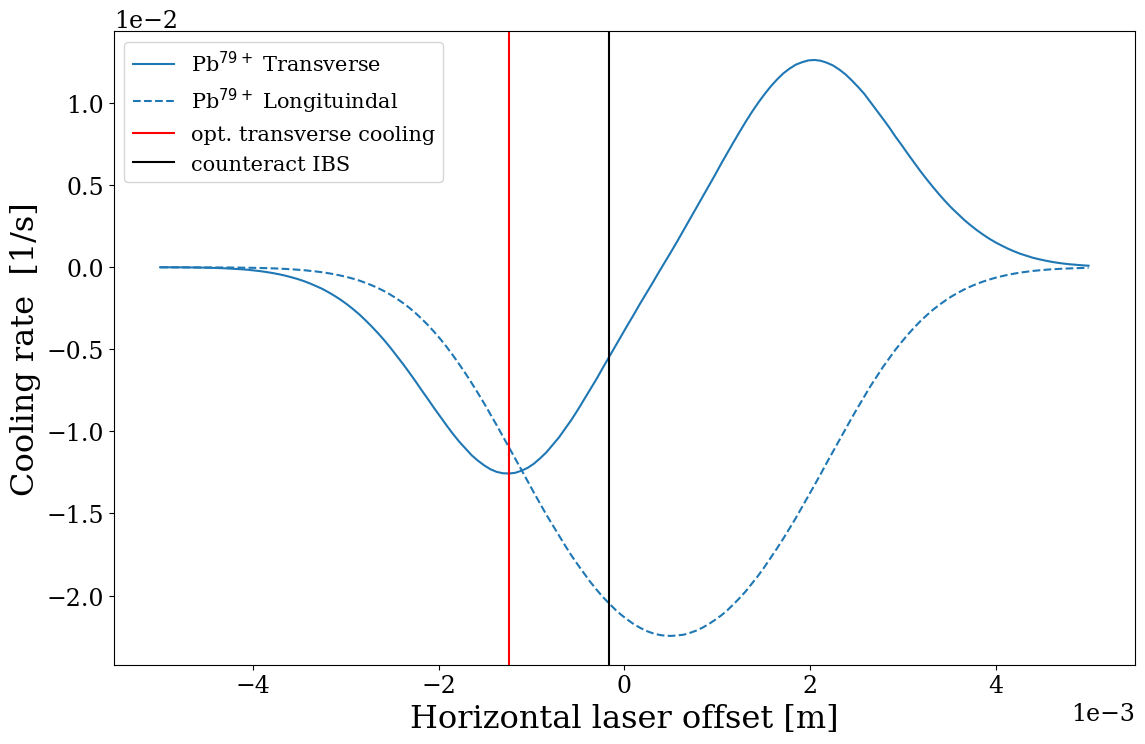

In [1142]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i,ion_loop in enumerate([lead]):# Ion properties:       
    data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(final_emittance_list)
    min_emittance = final_emittance_list[min_index]
    min_laser_offset = laser_x_list[min_index]

    print('min_laser_offset:',min_laser_offset*1e3)    
    
    plt.plot(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse',color=cycle[i])
    plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal',ls='--',color=cycle[i])
    
    plt.xlabel('Horizontal laser offset [m]')
    plt.ylabel('Cooling rate  [1/s]')
    ax = plt.gca()
    # Removing the offset from the y-axis tick labels
    ax.yaxis.get_major_formatter().set_useOffset(False)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.axvline(-1.2416107382550332*1e-3,color='red',label='opt. transverse cooling')
    plt.axvline(-0.16778523489932845*1e-3,color='black',label='counteract IBS')
    plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig('Optimal_laser_offset.png', dpi=300)
plt.show()

1it [00:00, 15.74it/s]


56
82
laser offset -0.16778523489932845 mm


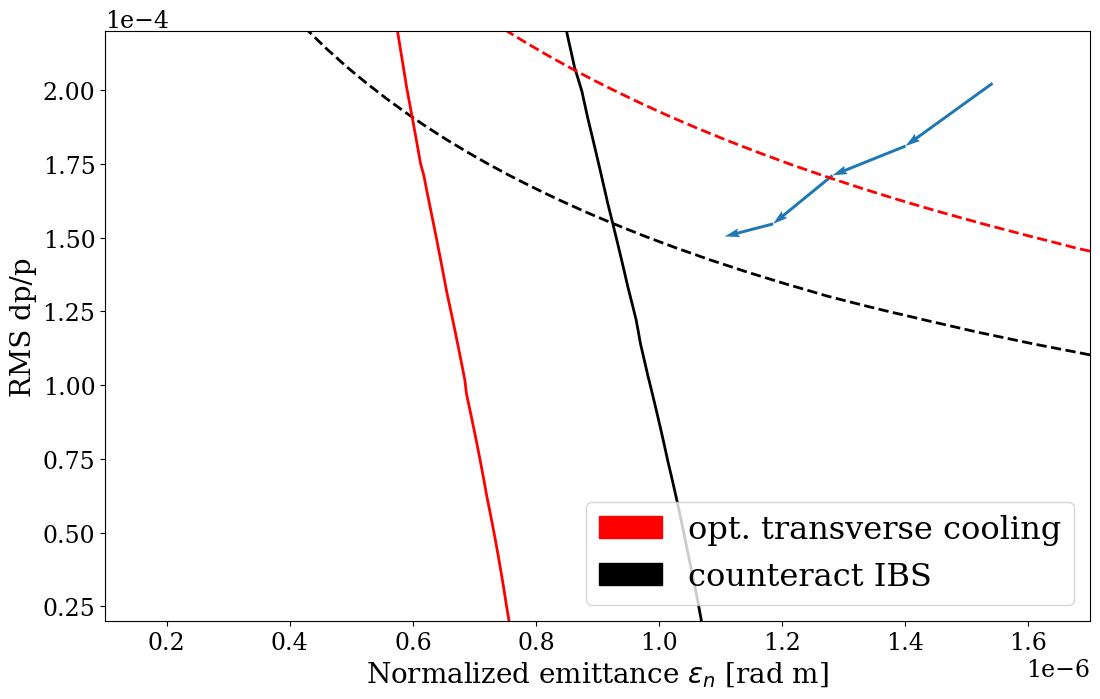

In [1143]:
from tqdm import tqdm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 40})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, ion_loop in tqdm(enumerate([lead])):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')
    linear_results = np.load(f'../linear_lattice/results/transverse/{ion_loop.name}.npz')

    delta = linear_results['delta']
    emittance_x = linear_results['emittance_x']
    time = linear_results['time']
    rms_dp_p = np.std(delta, axis=1)

    index_closest_to_40 = np.argmin(np.abs(time - 40))

    emittance_x_values = emittance_x[:]
    rms_dp_p_values = rms_dp_p[:]
    
    # Plot the contour
    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']
    
    loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
    laser_x_list=loaded_data['laser_x_list']
   
    

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    min_longituindal_index = np.argmin(longitudinal_growth_rate_list)
    print(min_transverse_index)
    print(min_longituindal_index)


    laser_position_index = 72
    laser_offset = laser_x_list[laser_position_index]
    print('laser offset',laser_offset*1e3,'mm')
    threshold_longitudinal2 = -longitudinal_growth_rate_list[laser_position_index]  # Set the threshold value
    threshold_transverse2 = -(transverse_growth_rate_list[laser_position_index])  # Set the threshold value

    
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse2, np.inf],
                    colors='black', linewidths=2)   

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal2],
                    colors='black', linestyles='--', linewidths=2)
    
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                    colors='red', linewidths=2)   

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                    colors='red', linestyles='--', linewidths=2)


    # Define the number of segments for each arrow
    num_segments = 5
    
    # Calculate the step size for each segment
    step_size = len(time) // num_segments
    
    # Plot each segment as a quiver plot
    for j in range(num_segments - 1):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = (j + 1) * step_size
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_values[start_idx]
        end_x = emittance_x_values[end_idx]
        
        start_y = rms_dp_p_values[start_idx]
        end_y = rms_dp_p_values[end_idx]
        
        #Plot the quiver plot for the segment
        plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1, scale_units='xy', angles='xy', color=cycle[i], width=0.003)
   
#Plotting the arrows on top completes, now let's adjust other settings

plt.xlim([n_emitt_list[0],n_emitt_list[-1]])
plt.xlabel('Normalized emittance $\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.legend(handles=[
    
    
    Patch(color='red', label=f'opt. transverse cooling'),
    Patch(color='black', label=f'counteract IBS'),
    
], loc='lower right')

plt.tight_layout()
plt.savefig('Equilibrium_emittance.png', dpi=300)
plt.show()


IBS xenon2

In [1144]:
# from tqdm import tqdm
# from matplotlib.patches import Patch

# from matplotlib.lines import Line2D

# cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# # Define custom legend handles with Line2D objects
# legend_handles = [
#     Line2D([0], [0], linestyle='-', color=cycle[0], label='Xenon (Transverse)'),
#     Line2D([0], [0], linestyle='--', color=cycle[0], label='Xenon (Longitudinal)'),
#     Line2D([0], [0], linestyle='-', color=cycle[1], label='Xenon 2nd (Transverse)'),
#     Line2D([0], [0], linestyle='--', color=cycle[1], label='Xenon 2nd (Longitudinal)'),
    
# ]

# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 20})

# for i, ion_loop in enumerate([xenon,xenon2nd]):    
#     data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

#     growth_rates_2d_x = data['growth_rates_2d_x']
#     growth_rates_2d_y = data['growth_rates_2d_y']
#     growth_rates_2d_z = data['growth_rates_2d_z']
#     sig_delta_list = data['sig_delta_list']
#     n_emitt_list = data['n_emitt_list']
   
#     loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
#     transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
#     longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
   
#     threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
   
#     plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
#                  colors=cycle[i], linewidths=2)

#     min_transverse_index = np.argmin(transverse_growth_rate_list)
#     threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    
#     plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
#                  colors=cycle[i], linestyles='--', linewidths=2)
    

# plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
# plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Injection', color='red', fontsize=20, ha='right')


# plt.xlabel('Normalized emittance $\epsilon_n$ [rad m]', fontsize=20)
# plt.ylabel('RMS dp/p', fontsize=20)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
# plt.legend(handles=legend_handles, loc='lower right', fontsize='medium')


# plt.tight_layout()
# plt.savefig('Equilibrium_emittance.png', dpi=300)
# plt.show()


min_laser_offset: -0.16778523489932845


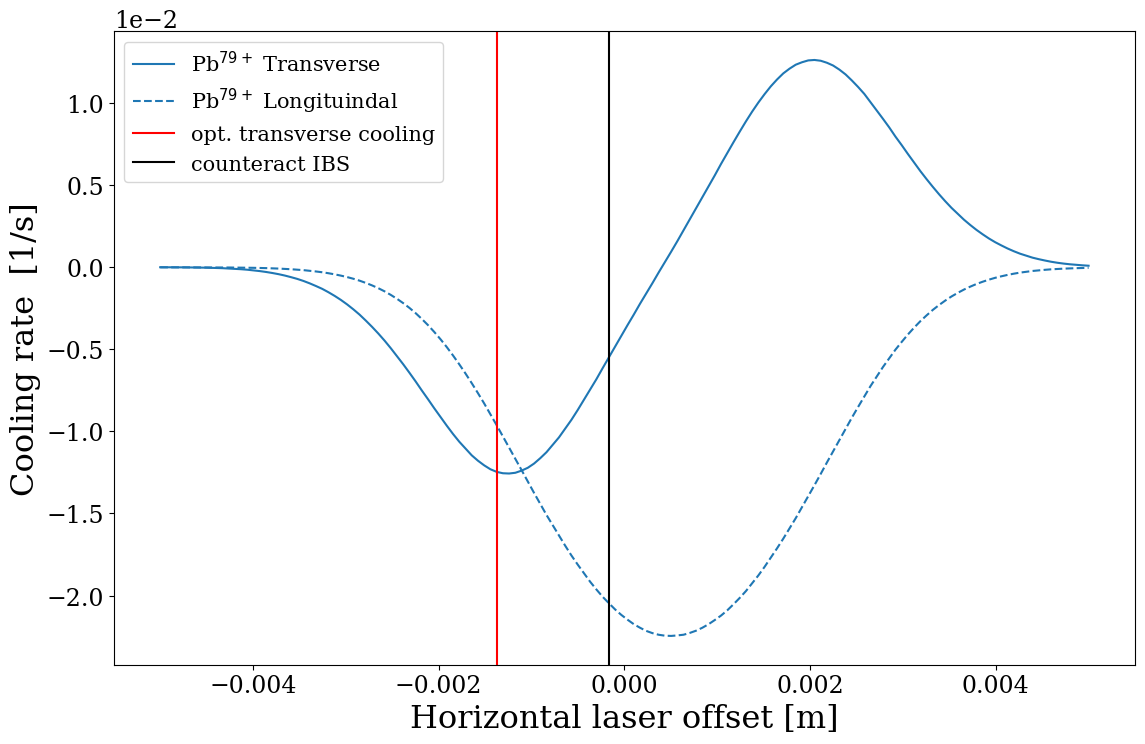

In [1145]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for ion_loop in [lead]:# Ion properties:       
    data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(final_emittance_list)
    min_emittance = final_emittance_list[min_index]
    min_laser_offset = laser_x_list[72]

    print('min_laser_offset:',min_laser_offset*1e3)    
    
    plt.plot(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse',color=cycle[0])
    plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal',ls='--',color=cycle[0])
    
    plt.xlabel('Horizontal laser offset [m]')
    plt.ylabel('Cooling rate  [1/s]')
    ax = plt.gca()
    # Removing the offset from the y-axis tick labels
    ax.yaxis.get_major_formatter().set_useOffset(False)
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.axvline(-1.3758389261744963*1e-3,color='red',label='opt. transverse cooling')
    plt.axvline(-0.16778523489932845*1e-3,color='black',label='counteract IBS')
    plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig('Optimal_laser_offset.png', dpi=300)
plt.show()

focus on lead because that is the one that we are going to optimise

In [1146]:
# from tqdm import tqdm
# from matplotlib.patches import Patch
# from matplotlib.lines import Line2D

# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 40})

# cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# for i, ion_loop in tqdm(enumerate([lead])):    
#     data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')
#     linear_results = np.load(f'../linear_lattice/results/{ion_loop.name}.npz')

#     delta = linear_results['delta']
#     emittance_x = linear_results['emittance_x']
#     time = linear_results['time']
#     rms_dp_p = np.std(delta, axis=1)

#     index_closest_to_40 = np.argmin(np.abs(time - 40))

#     emittance_x_values = emittance_x[:]
#     rms_dp_p_values = rms_dp_p[:]
    
#     # Plot the contour
#     growth_rates_2d_x = data['growth_rates_2d_x']
#     growth_rates_2d_y = data['growth_rates_2d_y']
#     growth_rates_2d_z = data['growth_rates_2d_z']
#     sig_delta_list = data['sig_delta_list']
#     n_emitt_list = data['n_emitt_list']
#     total_intensity = data['total_intensity']
    
#     loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
#     transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
#     longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
#     laser_x_list=loaded_data['laser_x_list']
   
    

#     min_transverse_index = np.argmin(transverse_growth_rate_list)
#     min_longituindal_index = np.argmin(longitudinal_growth_rate_list)
#     print(min_transverse_index)
#     print(min_longituindal_index)


#     laser_position_index = 67
#     laser_offset = laser_x_list[laser_position_index]
#     print('laser offset',laser_offset*1e3,'mm')
#     threshold_longitudinal2 = -longitudinal_growth_rate_list[laser_position_index]  # Set the threshold value
#     threshold_transverse2 = -(transverse_growth_rate_list[laser_position_index])  # Set the threshold value

    
#     # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse2, np.inf],
#     #                 colors=cycle[i], linewidths=2)   

#     # plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal2],
#                     # colors=cycle[i], linestyles='--', linewidths=2)
    
#     threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
#     min_transverse_index = np.argmin(transverse_growth_rate_list)
#     threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    

#     plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
#                     colors=cycle[i], linewidths=2)   

#     plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
#                     colors=cycle[i], linestyles='--', linewidths=2)


#     # Define the number of segments for each arrow
#     num_segments = 10
    
#     # Calculate the step size for each segment
#     step_size = len(time) // num_segments
    
#     # Plot each segment as a quiver plot
#     for j in range(num_segments - 1):
#         # Calculate the indices for the start and end points of the segment
#         start_idx = j * step_size
#         end_idx = (j + 1) * step_size
        
#         # Calculate the start and end points of the segment
#         start_x = emittance_x_values[start_idx]
#         end_x = emittance_x_values[end_idx]
        
#         start_y = rms_dp_p_values[start_idx]
#         end_y = rms_dp_p_values[end_idx]
        
#         #Plot the quiver plot for the segment
#         plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1, scale_units='xy', angles='xy', color=cycle[i], width=0.003)
   
# #Plotting the arrows on top completes, now let's adjust other settings
        

# plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
# plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Injection', color='red', fontsize=20, ha='right')        

# plt.xlim([n_emitt_list[0],n_emitt_list[-1]])
# plt.xlabel('Normalized emittance $\epsilon_n$ [rad m]', fontsize=20)
# plt.ylabel('RMS dp/p', fontsize=20)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# plt.legend(handles=[
#     Line2D([0], [0], linestyle='-', color=cycle[0], label='Lead (Transverse)'),
#     Line2D([0], [0], linestyle='--', color=cycle[0], label='Lead (Longitudinal)'),
    
# ], loc='lower right')

# plt.tight_layout()
# plt.savefig('Equilibrium_emittance.png', dpi=300)
# plt.show()


optimise lead

1it [00:00, 13.73it/s]


56
82
laser offset -1.2416107382550332 mm


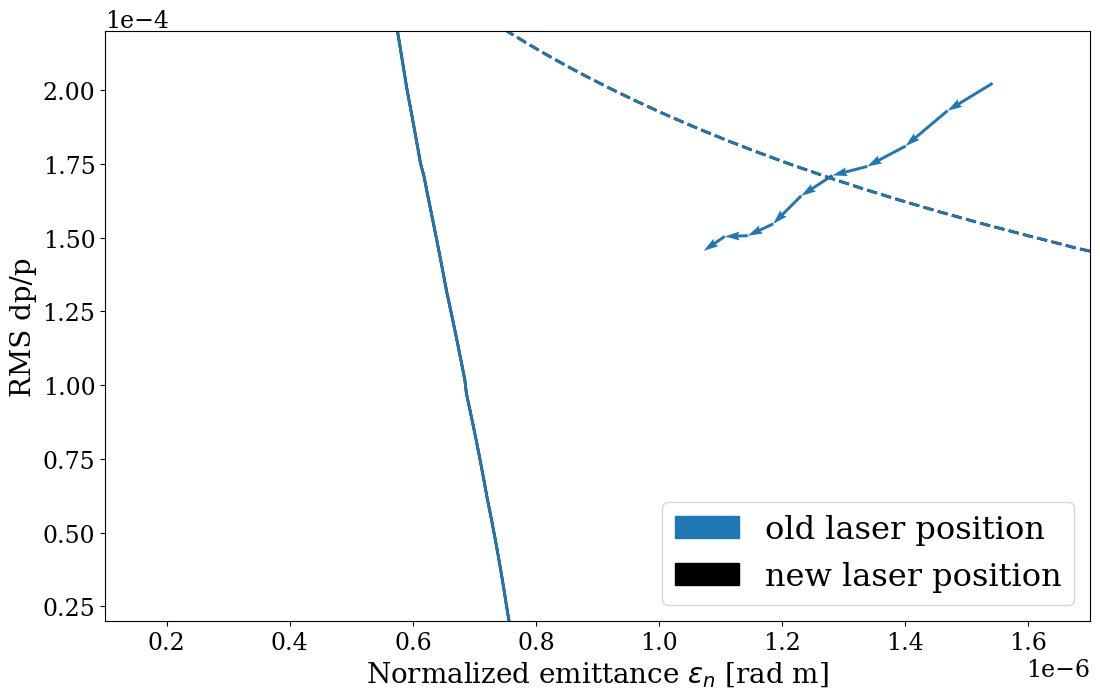

In [1147]:
from tqdm import tqdm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 40})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, ion_loop in tqdm(enumerate([lead])):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')
    linear_results = np.load(f'../linear_lattice/results/transverse/{ion_loop.name}.npz')

    delta = linear_results['delta']
    emittance_x = linear_results['emittance_x']
    time = linear_results['time']
    rms_dp_p = np.std(delta, axis=1)

    index_closest_to_40 = np.argmin(np.abs(time - 40))

    emittance_x_values = emittance_x[:]
    rms_dp_p_values = rms_dp_p[:]
    
    # Plot the contour
    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']
    
    loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
    laser_x_list=loaded_data['laser_x_list']
   
    

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    min_longituindal_index = np.argmin(longitudinal_growth_rate_list)
    print(min_transverse_index)
    print(min_longituindal_index)


    laser_position_index = min_transverse_index
    laser_offset = laser_x_list[laser_position_index]
    print('laser offset',laser_offset*1e3,'mm')
    threshold_longitudinal2 = -longitudinal_growth_rate_list[laser_position_index]  # Set the threshold value
    threshold_transverse2 = -(transverse_growth_rate_list[laser_position_index])  # Set the threshold value

    
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse2, np.inf],
                    colors='black', linewidths=2)   

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal2],
                    colors='black', linestyles='--', linewidths=2)
    
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                    colors=cycle[i], linewidths=2)   

    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                    colors=cycle[i], linestyles='--', linewidths=2)


    # Define the number of segments for each arrow
    num_segments = 10
    
    # Calculate the step size for each segment
    step_size = len(time) // num_segments
    
    # Plot each segment as a quiver plot
    for j in range(num_segments - 1):
        # Calculate the indices for the start and end points of the segment
        start_idx = j * step_size
        end_idx = (j + 1) * step_size
        
        # Calculate the start and end points of the segment
        start_x = emittance_x_values[start_idx]
        end_x = emittance_x_values[end_idx]
        
        start_y = rms_dp_p_values[start_idx]
        end_y = rms_dp_p_values[end_idx]
        
        #Plot the quiver plot for the segment
        plt.quiver(start_x, start_y, end_x - start_x, end_y - start_y, scale=1, scale_units='xy', angles='xy', color=cycle[i], width=0.003)
   
#Plotting the arrows on top completes, now let's adjust other settings

plt.xlim([n_emitt_list[0],n_emitt_list[-1]])
plt.xlabel('Normalized emittance $\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.legend(handles=[
    
    
    Patch(color=cycle[0], label=f'old laser position'),
    Patch(color='black', label=f'new laser position'),
    
], loc='lower right')

plt.tight_layout()
plt.savefig('Equilibrium_emittance.png', dpi=300)
plt.show()


In [1148]:
# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 25})

# cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# for i, ion_loop in tqdm(enumerate(ions)):    
#     data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

#     growth_rates_2d_x = data['growth_rates_2d_x']
#     growth_rates_2d_y = data['growth_rates_2d_y']
#     growth_rates_2d_z = data['growth_rates_2d_z']
#     sig_delta_list = data['sig_delta_list']
#     n_emitt_list = data['n_emitt_list']
#     total_intensity = data['total_intensity']
    
#     threshold = longitundinal_growth_rate[i]  # Set the threshold value
   
#     plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold, np.inf], colors=cycle[i], linewidths=2)

#     plt.xlabel('Normalized emittance $\epsilon_n [\mu m]$', fontsize=20)
#     plt.ylabel('RMS dp/p', fontsize=20)
#     plt.title(f'{ion_loop.name}')
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
#     plt.legend(handles=[
#         Patch(color='orange', label='Threshold'),
#         Patch(color='green', label='Laser cooling'),
#         Patch(color='red', label='IBS bunched')
#     ])
# plt.tight_layout()

# plt.show()

troep

min_laser_offset: -1.2416107382550332


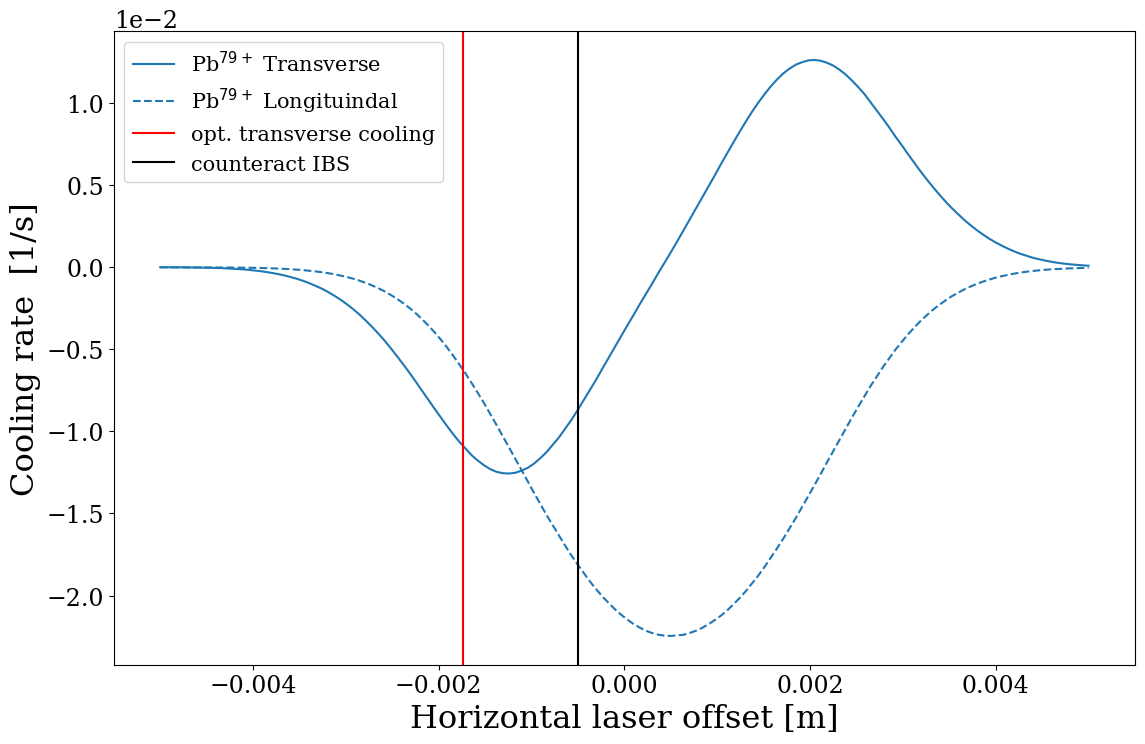

In [1149]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i,ion_loop in enumerate([lead]):# Ion properties:       
    data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(final_emittance_list)
    min_emittance = final_emittance_list[min_index]
    min_laser_offset = laser_x_list[min_index]

    print('min_laser_offset:',min_laser_offset*1e3)    
    
    plt.plot(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse',color=cycle[i])
    plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal',color=cycle[i],ls='--')
    
    plt.xlabel('Horizontal laser offset [m]')
    plt.ylabel('Cooling rate  [1/s]')
    ax = plt.gca()
    # Removing the offset from the y-axis tick labels
    ax.yaxis.get_major_formatter().set_useOffset(False)
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.axvline(-1.7346938775510203*1e-3,color='red',label='opt. transverse cooling')
    plt.axvline(-0.5033557046979862*1e-3,color='black',label='counteract IBS')
    plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig('Optimal_laser_offset.png', dpi=300)
plt.show()

0it [00:00, ?it/s]

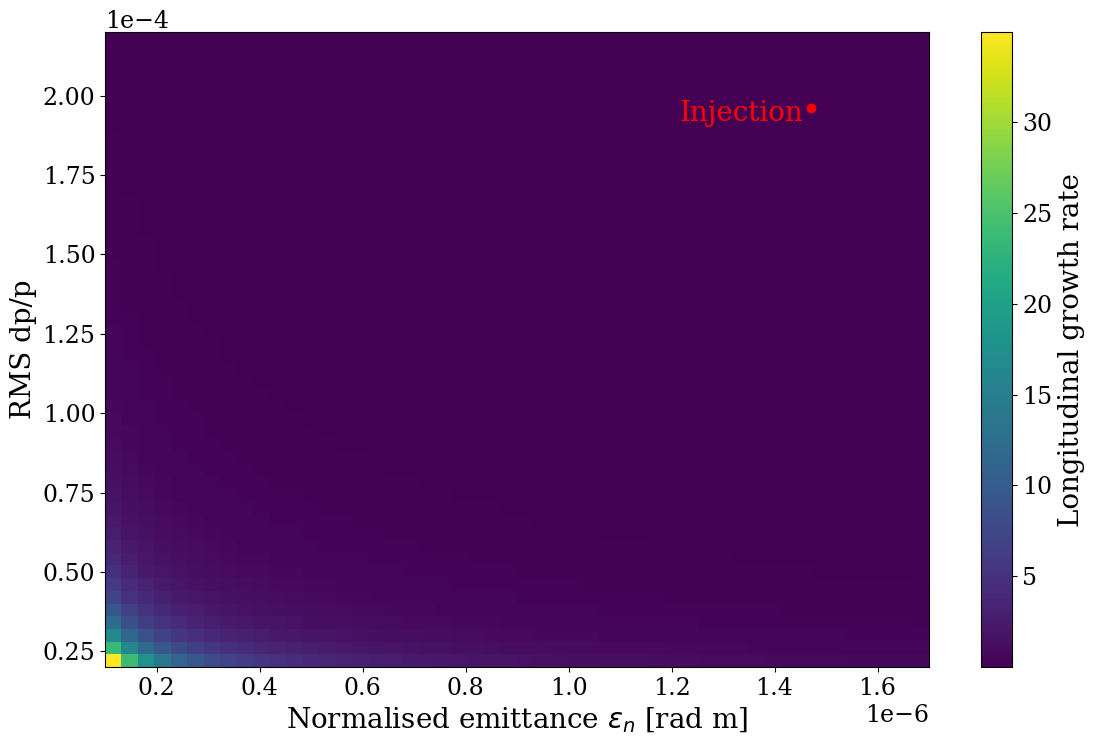

1it [00:00,  3.64it/s]


In [1150]:
# injection_nemitt = 1.5*1e-6 # m*rad (normalized emittance)
# injection_dp_p = 1e-4

for i,ion_loop in tqdm(enumerate([lead])):

    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    #max_growth_rate=np.maximum(growth_rates_2d_x,growth_rates_2d_y,growth_rates_2d_z)
    # max_growth_rate = np.maximum.reduce([growth_rates_2d_x, growth_rates_2d_y, growth_rates_2d_z])
    # max_growth_rate=growth_rates_2d_x
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']

    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 25})

    # Plot the heatmap
    plt.imshow(growth_rates_2d_z, extent=[n_emitt_list.min(), n_emitt_list.max(), sig_delta_list[0], sig_delta_list[-1]],
               aspect='auto', origin='lower', cmap='viridis',norm=None)
       
    cbar = plt.colorbar()
    cbar.set_label('Longitudinal growth rate', fontsize=20)

    # Add injection point
    plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
    plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Injection', color='red', fontsize=20, ha='right')

    #contour = plt.contour(geo_epsx_list, sig_delta_list, growth_rates_2d_x, levels=[threshold], colors='red', linewidths=2)
    plt.xlabel('Normalised emittance $\epsilon_n$ [rad m]', fontsize=20)
    plt.ylabel('RMS dp/p', fontsize=20)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    plt.tight_layout()
    # plt.savefig('Lead_cooling_IBS_regime.png', dpi=300)
    plt.show()
    ###############################################################################################################################


# print(f'Cooling rate: ({ion_loop.name}): {transverse_growth_rate_list[i]:.2f}')

transverse growth rate

0it [00:00, ?it/s]

150
threshold_longitudinal: 0.010980105544125254
threshold_transverse: 0.012566024316543765


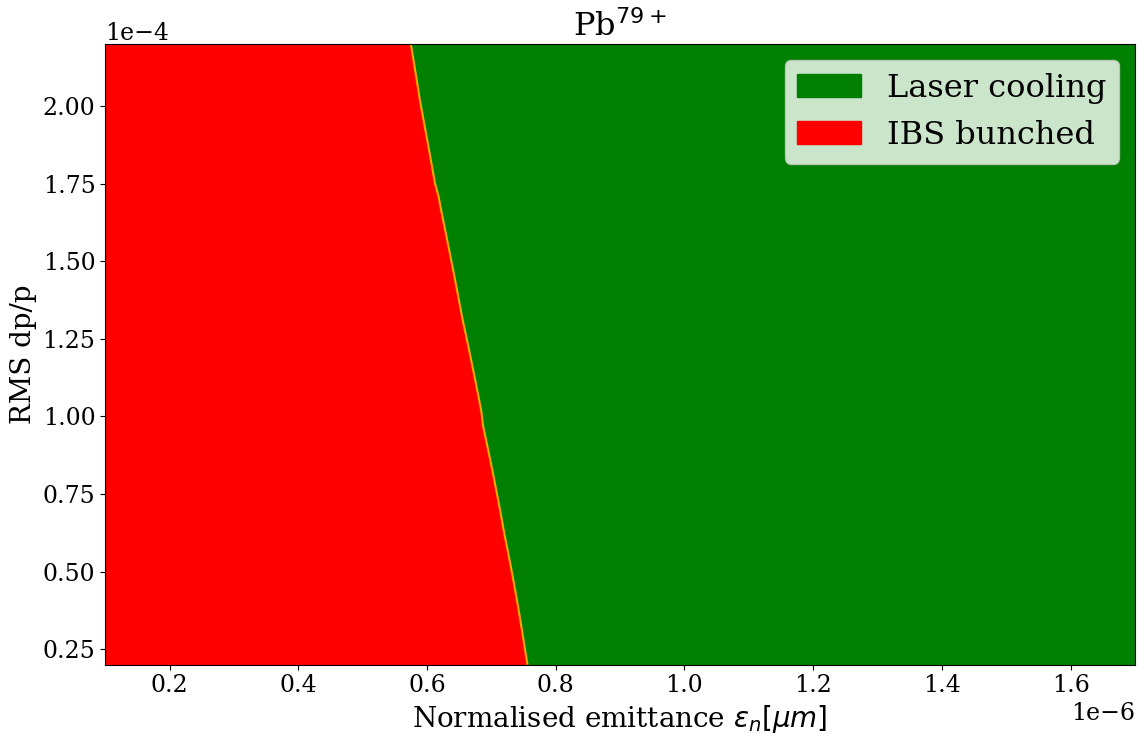

1it [00:00,  4.65it/s]

150
threshold_longitudinal: 0.03799304018381079
threshold_transverse: 0.06228314884286544


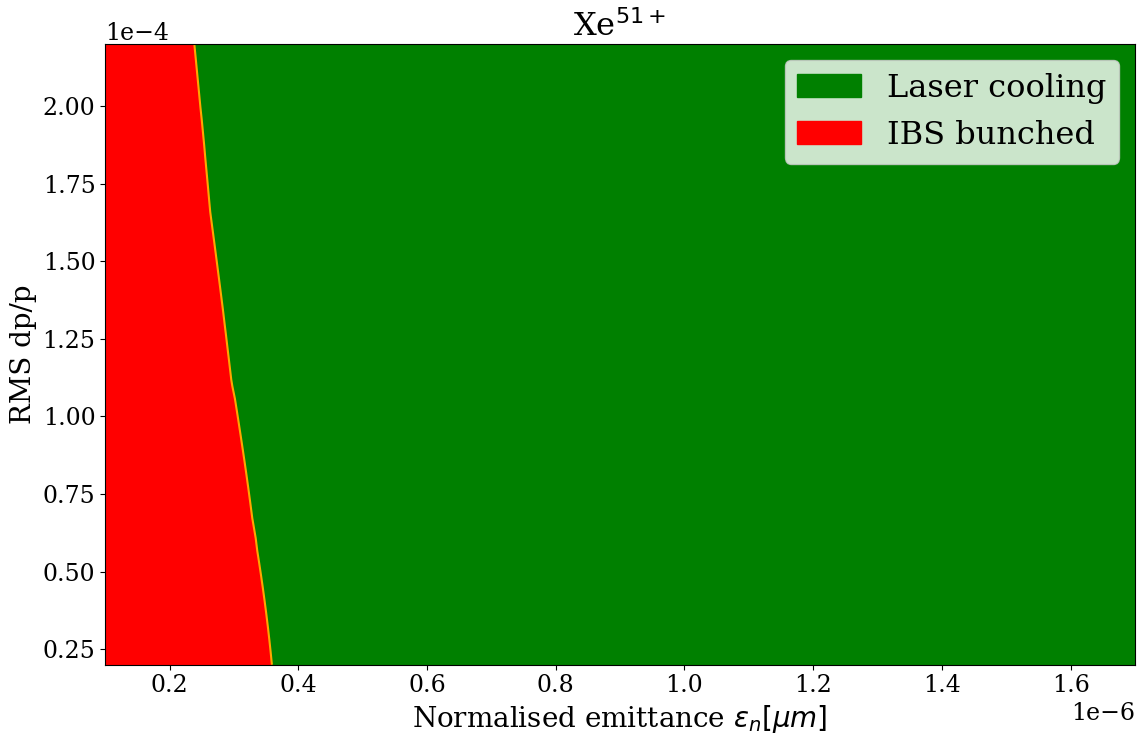

2it [00:00,  4.66it/s]

150
threshold_longitudinal: 0.17642993831316442
threshold_transverse: 0.34771320908052394


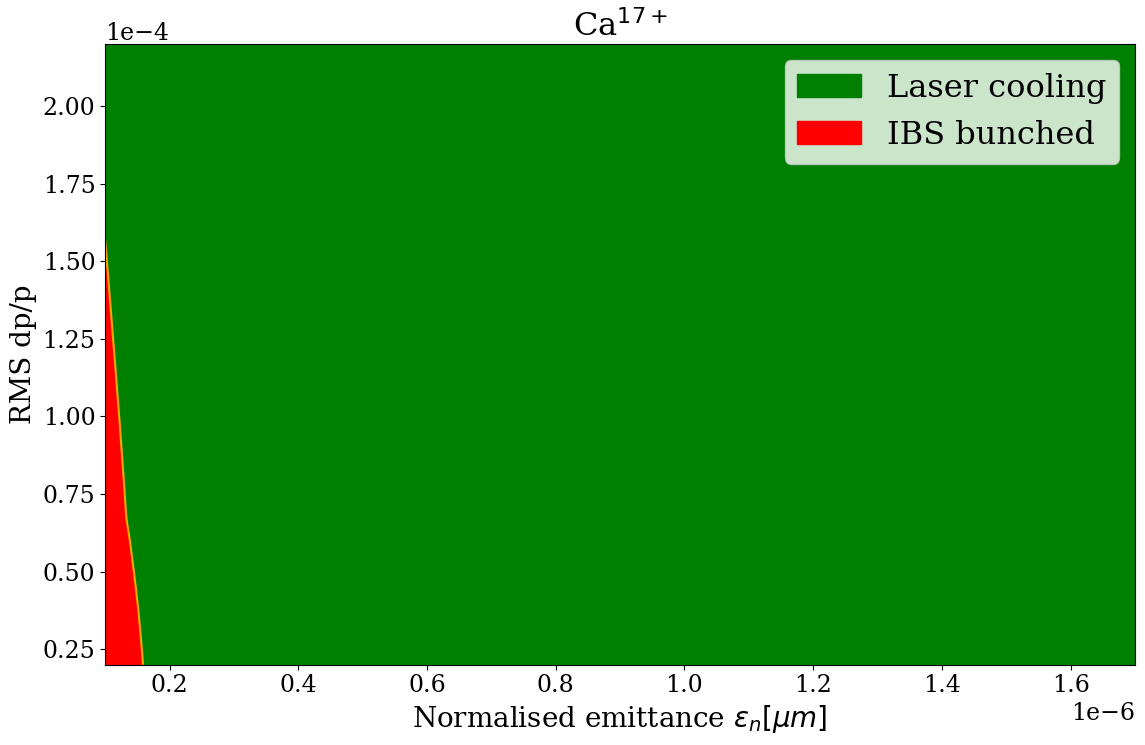

3it [00:00,  4.70it/s]


In [1151]:
for i,ion_loop in tqdm(enumerate(ions)):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    # max_growth_rate = np.maximum.reduce([growth_rates_2d_x, growth_rates_2d_y, growth_rates_2d_z])
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']

    loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
    
    print(len(transverse_growth_rate_list))
    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 25})
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value

    print('threshold_longitudinal:',threshold_longitudinal)
    print('threshold_transverse:',threshold_transverse)
    
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse], colors='orange')
    plt.contourf(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[0,threshold_transverse], colors='green')
    plt.contourf(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse,np.inf], colors='red')

    plt.xlabel('Normalised emittance $\epsilon_n [\mu m]$', fontsize=20)
    plt.ylabel('RMS dp/p', fontsize=20)
    plt.title(f'{ion_loop.name}')
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    plt.legend(handles=[
        Patch(color='green', label='Laser cooling'),
        Patch(color='red', label='IBS bunched')
    ])
    plt.tight_layout()
    plt.show()



compare longitudinal

0it [00:00, ?it/s]

150
0.012566024316543765


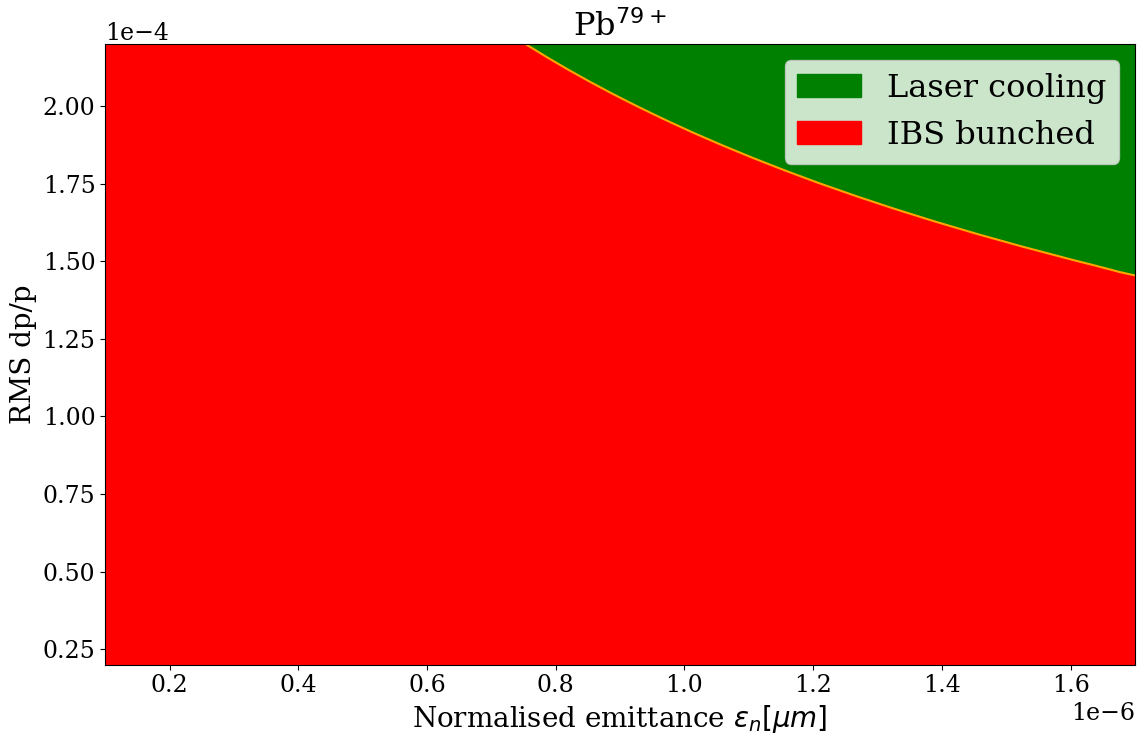

1it [00:00,  4.71it/s]


In [1152]:
for i,ion_loop in tqdm(enumerate([lead])):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    # max_growth_rate = np.maximum.reduce([growth_rates_2d_x, growth_rates_2d_y, growth_rates_2d_z])
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
    total_intensity = data['total_intensity']

    loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
    
    print(len(transverse_growth_rate_list))
    plt.figure(figsize=(12, 8))
    plt.rcParams.update({'font.size': 25})
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value

    print(threshold_transverse)

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value

    
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal], colors='orange')
    plt.contourf(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[0,threshold_longitudinal], colors='green')
    plt.contourf(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal,np.inf], colors='red')

    plt.xlabel('Normalised emittance $\epsilon_n [\mu m]$', fontsize=20)
    plt.ylabel('RMS dp/p', fontsize=20)
    plt.title(f'{ion_loop.name}')
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    plt.legend(handles=[
        Patch(color='green', label='Laser cooling'),
        Patch(color='red', label='IBS bunched')
    ])
    plt.tight_layout()
    plt.show()



old vs new laser time shift

In [1153]:
# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 25})

# cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# for i,ion_loop in enumerate([xenon]):# Ion properties:       
#     data = np.load(f'../linear_lattice/results/optimal_laser_x(no_shift)/{ion_loop.name}.npz')

#     # Access the variables stored in the file
#     transverse_growth_rate_list = data['transverse_growth_rate_list']
#     final_emittance_list = data['final_emittance_list']
#     final_dp_p=data['final_dp_p']
#     longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
#     laser_x_list = data['laser_x_list']
#     nemitt = data['nemitt']
#     time = data['time']

#     ######################################################################
#     # Find laser position with minimal final emittance

#     min_index = np.argmin(final_emittance_list)
#     min_emittance = final_emittance_list[min_index]
#     min_laser_offset = laser_x_list[min_index]

#     print('min_laser_offset:',min_laser_offset*1e3)    
    
#     plt.plot(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse no shift',color=cycle[i])
#     plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal no shift',color=cycle[i],ls='--')
    


#     data = np.load(f'../linear_lattice/results/optimal_laser_x(shift)/{ion_loop.name}.npz')

#     # Access the variables stored in the file
#     transverse_growth_rate_list = data['transverse_growth_rate_list']
#     final_emittance_list = data['final_emittance_list']
#     final_dp_p=data['final_dp_p']
#     longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
#     laser_x_list = data['laser_x_list']
#     nemitt = data['nemitt']
#     time = data['time']

#     plt.plot(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse shift',color=cycle[1])
#     plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal shift',color=cycle[1],ls='--')


#     plt.xlabel('Horizontal laser offset [m]')
#     plt.ylabel('Cooling rate  [1/s]')
#     ax = plt.gca()
#     # Removing the offset from the y-axis tick labels
#     ax.yaxis.get_major_formatter().set_useOffset(False)
#     # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#     #plt.axvline(-1.7346938775510203*1e-3,color='red',label='opt. transverse cooling')
#     #plt.axvline(-0.5033557046979862*1e-3,color='black',label='counteract IBS')
#     plt.legend(fontsize=15)
# plt.tight_layout()
# # plt.savefig('Optimal_laser_offset.png', dpi=300)
# plt.show()

min_laser_offset: -1.2416107382550332


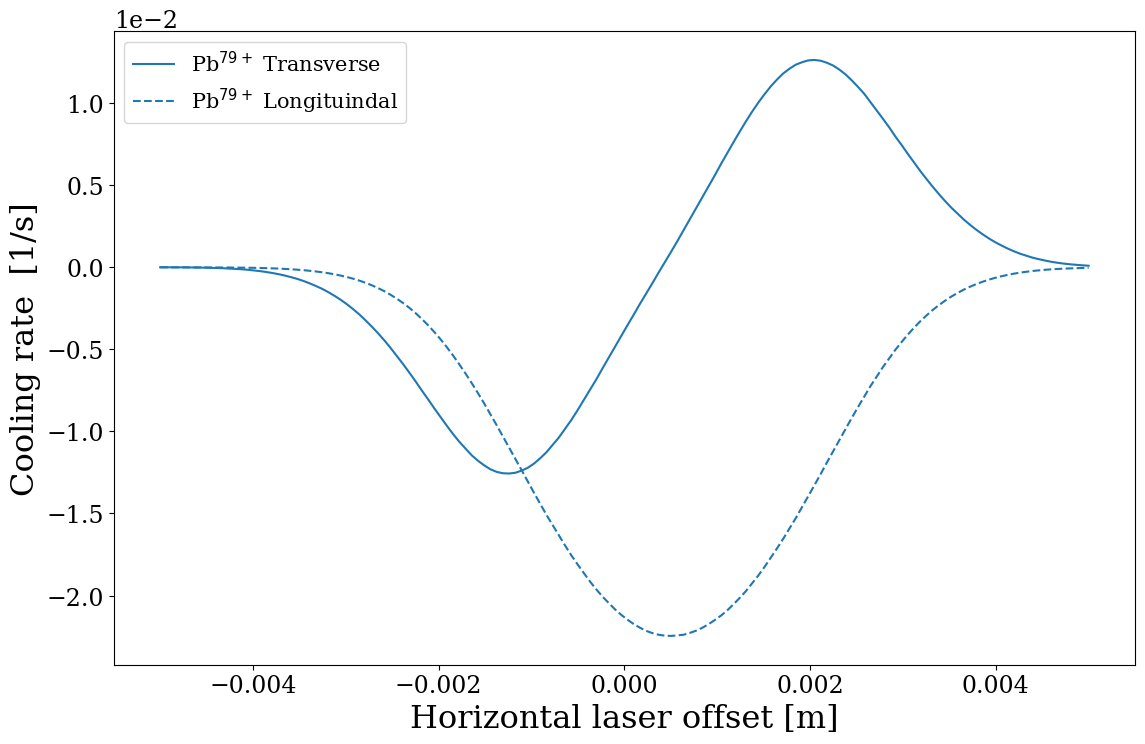

In [1154]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i,ion_loop in enumerate([lead]):# Ion properties:       
    data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(final_emittance_list)
    min_emittance = final_emittance_list[min_index]
    min_laser_offset = laser_x_list[min_index]

    print('min_laser_offset:',min_laser_offset*1e3)    
    
    plt.plot(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse',color=cycle[i])
    plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal',color=cycle[i],ls='--')
    

    plt.xlabel('Horizontal laser offset [m]')
    plt.ylabel('Cooling rate  [1/s]')
    ax = plt.gca()
    # Removing the offset from the y-axis tick labels
    ax.yaxis.get_major_formatter().set_useOffset(False)
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    #plt.axvline(-1.7346938775510203*1e-3,color='red',label='opt. transverse cooling')
    #plt.axvline(-0.5033557046979862*1e-3,color='black',label='counteract IBS')
    plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig('Optimal_laser_offset.png', dpi=300)
plt.show()

compare different gamma's

min_laser_offset: -1.2416107382550332


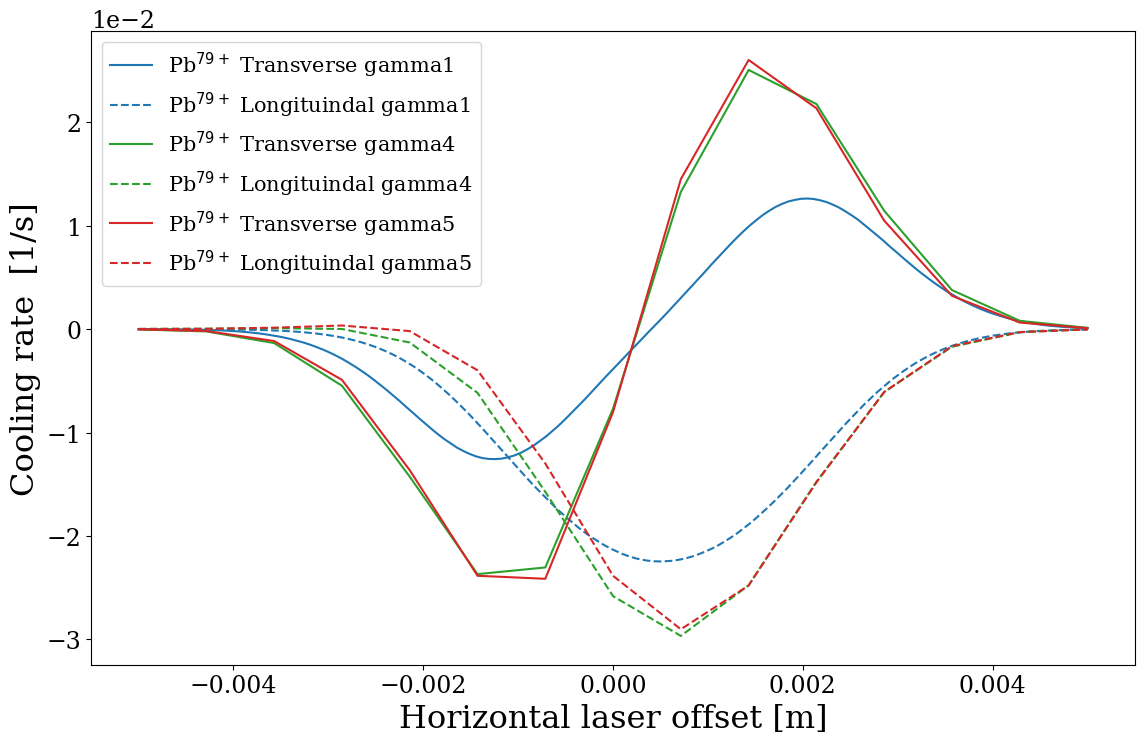

In [1155]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i,ion_loop in enumerate([lead]):# Ion properties:       
    data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(final_emittance_list)
    min_emittance = final_emittance_list[min_index]
    min_laser_offset = laser_x_list[min_index]

    print('min_laser_offset:',min_laser_offset*1e3)    
    
    plt.plot(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse gamma1',color=cycle[i])
    plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal gamma1',color=cycle[i],ls='--')
    


    # data = np.load(f'../linear_lattice/results/optimal_laser_x(gamma2)/{ion_loop.name}.npz')

    # # Access the variables stored in the file
    # transverse_growth_rate_list = data['transverse_growth_rate_list']
    # final_emittance_list = data['final_emittance_list']
    # final_dp_p=data['final_dp_p']
    # longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    # laser_x_list = data['laser_x_list']
    # nemitt = data['nemitt']
    # time = data['time']

    # plt.plot(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse gamma2',color=cycle[1])
    # plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal gamma2',color=cycle[1],ls='--')



    data = np.load(f'../linear_lattice/results/optimal_laser_x(gamma4)/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    plt.plot(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse gamma4',color=cycle[2])
    plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal gamma4',color=cycle[2],ls='--')

    data = np.load(f'../linear_lattice/results/optimal_laser_x(gamma5)/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    plt.plot(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse gamma5',color=cycle[3])
    plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal gamma5',color=cycle[3],ls='--')


    plt.xlabel('Horizontal laser offset [m]')
    plt.ylabel('Cooling rate  [1/s]')
    ax = plt.gca()
    # Removing the offset from the y-axis tick labels
    ax.yaxis.get_major_formatter().set_useOffset(False)
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    #plt.axvline(-1.7346938775510203*1e-3,color='red',label='opt. transverse cooling')
    #plt.axvline(-0.5033557046979862*1e-3,color='black',label='counteract IBS')
    plt.legend(fontsize=15,loc='upper left')
plt.tight_layout()
# plt.savefig('Optimal_laser_offset.png', dpi=300)
plt.show()

new case without chaing puslse duration

min_laser_offset: -1.2416107382550332


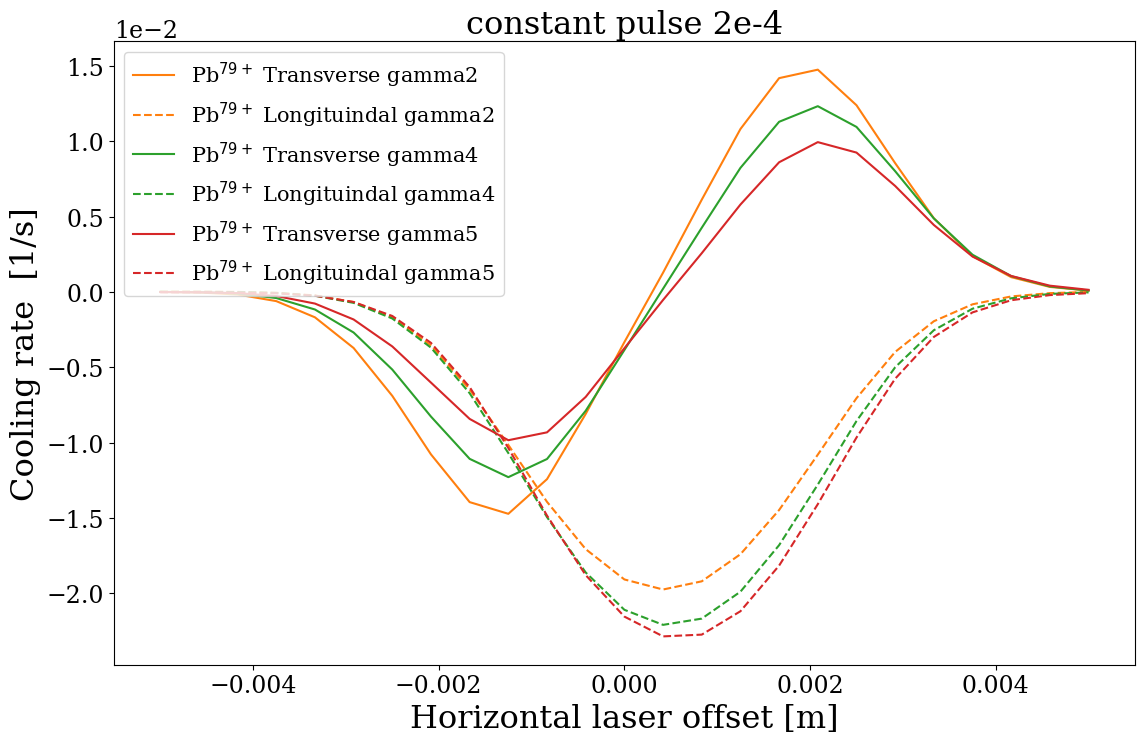

In [1156]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i,ion_loop in enumerate([lead]):# Ion properties:       
    data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    ######################################################################
    # Find laser position with minimal final emittance

    min_index = np.argmin(final_emittance_list)
    min_emittance = final_emittance_list[min_index]
    min_laser_offset = laser_x_list[min_index]

    print('min_laser_offset:',min_laser_offset*1e3)    
    
    #plt.plot(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse gamma1',color=cycle[i])
    #plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal gamma1',color=cycle[i],ls='--')
    


    data = np.load(f'../linear_lattice/results/optimal_laser_x(gamma_loop2)/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    plt.plot(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse gamma2',color=cycle[1])
    plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal gamma2',color=cycle[1],ls='--')



    data = np.load(f'../linear_lattice/results/optimal_laser_x(gamma_loop4)/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    plt.plot(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse gamma4',color=cycle[2])
    plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal gamma4',color=cycle[2],ls='--')

    data = np.load(f'../linear_lattice/results/optimal_laser_x(gamma_loop5)/{ion_loop.name}.npz')

    # Access the variables stored in the file
    transverse_growth_rate_list = data['transverse_growth_rate_list']
    final_emittance_list = data['final_emittance_list']
    final_dp_p=data['final_dp_p']
    longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
    laser_x_list = data['laser_x_list']
    nemitt = data['nemitt']
    time = data['time']

    plt.plot(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse gamma5',color=cycle[3])
    plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal gamma5',color=cycle[3],ls='--')


    plt.xlabel('Horizontal laser offset [m]')
    plt.ylabel('Cooling rate  [1/s]')
    ax = plt.gca()
    # Removing the offset from the y-axis tick labels
    ax.yaxis.get_major_formatter().set_useOffset(False)
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    #plt.axvline(-1.7346938775510203*1e-3,color='red',label='opt. transverse cooling')
    #plt.axvline(-0.5033557046979862*1e-3,color='black',label='counteract IBS')
    plt.legend(fontsize=15,loc='upper left')
plt.title('constant pulse 2e-4')    
plt.tight_layout()
# plt.savefig('Optimal_laser_offset.png', dpi=300)
plt.show()

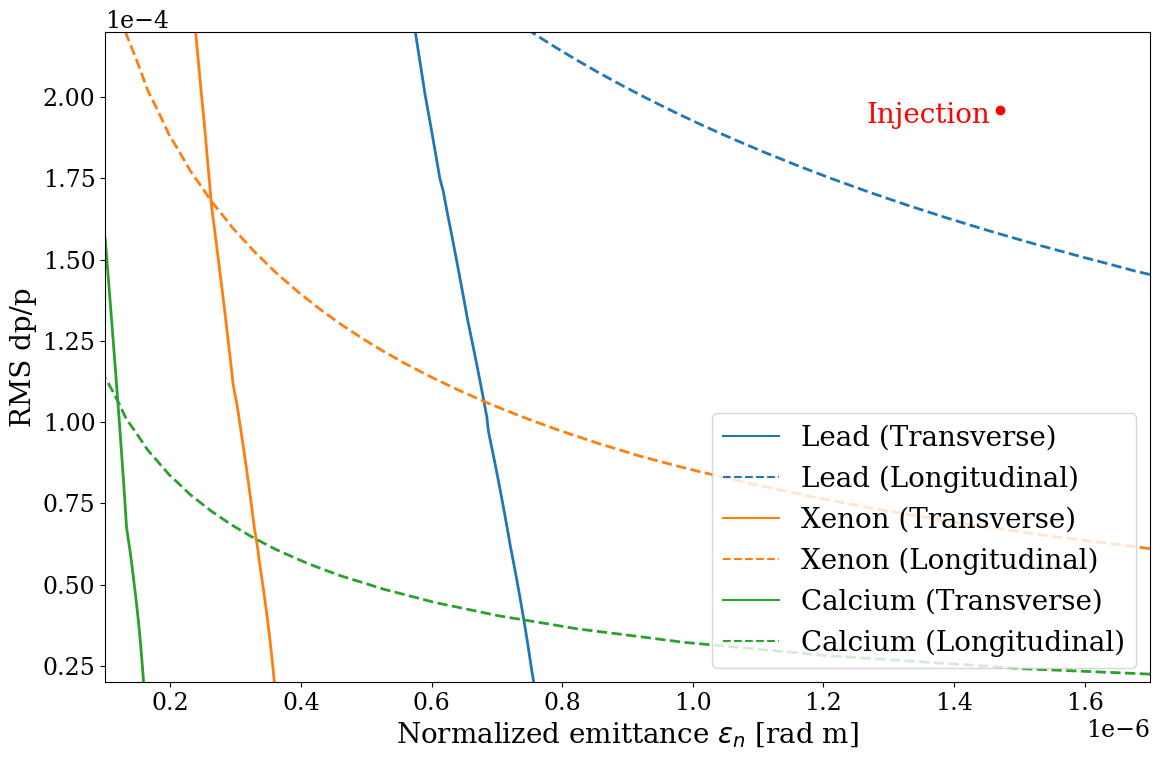

In [1157]:
from tqdm import tqdm
from matplotlib.patches import Patch

from matplotlib.lines import Line2D

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define custom legend handles with Line2D objects
legend_handles = [
    Line2D([0], [0], linestyle='-', color=cycle[0], label='Lead (Transverse)'),
    Line2D([0], [0], linestyle='--', color=cycle[0], label='Lead (Longitudinal)'),
    Line2D([0], [0], linestyle='-', color=cycle[1], label='Xenon (Transverse)'),
    Line2D([0], [0], linestyle='--', color=cycle[1], label='Xenon (Longitudinal)'),
    Line2D([0], [0], linestyle='-', color=cycle[2], label='Calcium (Transverse)'),
    Line2D([0], [0], linestyle='--', color=cycle[2], label='Calcium (Longitudinal)')
]

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})

for i, ion_loop in enumerate(ions):    
    data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

    growth_rates_2d_x = data['growth_rates_2d_x']
    growth_rates_2d_y = data['growth_rates_2d_y']
    growth_rates_2d_z = data['growth_rates_2d_z']
    sig_delta_list = data['sig_delta_list']
    n_emitt_list = data['n_emitt_list']
   
    loaded_data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')
    transverse_growth_rate_list = loaded_data['transverse_growth_rate_list']
    longitudinal_growth_rate_list=loaded_data['longitudinal_growth_rate_list']
   
    threshold_transverse = -min(transverse_growth_rate_list)  # Set the threshold value
   
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_x, levels=[threshold_transverse, np.inf],
                 colors=cycle[i], linewidths=2)

    min_transverse_index = np.argmin(transverse_growth_rate_list)
    threshold_longitudinal = -longitudinal_growth_rate_list[min_transverse_index]  # Set the threshold value
    
    plt.contour(n_emitt_list, sig_delta_list, growth_rates_2d_z, levels=[threshold_longitudinal],
                 colors=cycle[i], linestyles='--', linewidths=2)
    

plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Injection', color='red', fontsize=20, ha='right')


plt.xlabel('Normalized emittance $\epsilon_n$ [rad m]', fontsize=20)
plt.ylabel('RMS dp/p', fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.legend(handles=legend_handles, loc='lower right', fontsize='medium')


plt.tight_layout()
plt.savefig('Equilibrium_emittance.png', dpi=300)
plt.show()


In [1158]:
# import matplotlib.pyplot as plt
# import numpy as np

# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 25})

# cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# for i,ion_loop in enumerate([xenon,xenon2nd]):# Ion properties:       
#     data = np.load(f'../linear_lattice/results/optimal_laser_x/{ion_loop.name}.npz')

#     # Access the variables stored in the file
#     transverse_growth_rate_list = data['transverse_growth_rate_list']
#     final_emittance_list = data['final_emittance_list']
#     final_dp_p=data['final_dp_p']
#     longitudinal_growth_rate_list=data['longitudinal_growth_rate_list']
#     laser_x_list = data['laser_x_list']
#     nemitt = data['nemitt']
#     time = data['time']

#     ######################################################################
#     # Find laser position with minimal final emittance

#     min_index = np.argmin(final_emittance_list)
#     min_emittance = final_emittance_list[min_index]
#     min_laser_offset = laser_x_list[min_index]

#     print('min_laser_offset:',min_laser_offset*1e3)    
    
#     plt.plot(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse',color=cycle[i])
#     plt.plot(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal',color=cycle[i],ls='--')

#     # plt.scatter(laser_x_list,transverse_growth_rate_list,label=f'{ion_loop.name} Transverse',color=cycle[i])
#     # plt.scatter(laser_x_list,longitudinal_growth_rate_list,label=f'{ion_loop.name} Longituindal',color=cycle[i],ls='--')
    

#     plt.xlabel('Horizontal laser offset [m]')
#     plt.ylabel('Cooling rate  [1/s]')
#     ax = plt.gca()
#     # Removing the offset from the y-axis tick labels
#     ax.yaxis.get_major_formatter().set_useOffset(False)
#     # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#     #plt.axvline(-1.7346938775510203*1e-3,color='red',label='opt. transverse cooling')
#     #plt.axvline(-0.5033557046979862*1e-3,color='black',label='counteract IBS')
#     plt.legend(fontsize=15)
# plt.tight_layout()
# # plt.savefig('Optimal_laser_offset.png', dpi=300)
# plt.show()

In [1159]:
# # injection_nemitt = 1.5*1e-6 # m*rad (normalized emittance)
# # injection_dp_p = 1e-4

# for i,ion_loop in tqdm(enumerate([xenon,xenon2nd])):

#     data = np.load(f'IBS_results_bunched/{ion_loop.name}.npz')

#     growth_rates_2d_x = data['growth_rates_2d_x']
#     growth_rates_2d_y = data['growth_rates_2d_y']
#     growth_rates_2d_z = data['growth_rates_2d_z']
#     #max_growth_rate=np.maximum(growth_rates_2d_x,growth_rates_2d_y,growth_rates_2d_z)
#     # max_growth_rate = np.maximum.reduce([growth_rates_2d_x, growth_rates_2d_y, growth_rates_2d_z])
#     # max_growth_rate=growth_rates_2d_x
#     sig_delta_list = data['sig_delta_list']
#     n_emitt_list = data['n_emitt_list']
#     total_intensity = data['total_intensity']

#     plt.figure(figsize=(12, 8))
#     plt.rcParams.update({'font.size': 25})

#     # Plot the heatmap
#     plt.imshow(growth_rates_2d_z, extent=[n_emitt_list.min(), n_emitt_list.max(), sig_delta_list[0], sig_delta_list[-1]],
#                aspect='auto', origin='lower', cmap='viridis',norm=None)
       
#     cbar = plt.colorbar()
#     cbar.set_label('Longitudinal growth rate', fontsize=20)

#     # Add injection point
#     plt.scatter(0.98*injection_nemitt, 0.98*injection_dp_p, color='red', label='Injection Point')
#     plt.text(0.97*injection_nemitt, 0.96*injection_dp_p, 'Injection', color='red', fontsize=20, ha='right')

#     #contour = plt.contour(geo_epsx_list, sig_delta_list, growth_rates_2d_x, levels=[threshold], colors='red', linewidths=2)
#     plt.xlabel('Normalised emittance $\epsilon_n$ [rad m]', fontsize=20)
#     plt.ylabel('RMS dp/p', fontsize=20)
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
#     plt.tight_layout()
#     # plt.savefig('Lead_cooling_IBS_regime.png', dpi=300)
#     plt.show()
#     ###############################################################################################################################


# # print(f'Cooling rate: ({ion_loop.name}): {transverse_growth_rate_list[i]:.2f}')